In [ ]:
# Importing the necessary libraries:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from string import ascii_letters
!pip install scorecardpy
import scorecardpy as sc

In [ ]:
data = pd.read_csv('LCOrigination.csv',)


C:\Users\Gavin\AppData\Local\Temp\ipykernel_15056\991722375.py:1: DtypeWarning: Columns (0,14,42,98,109,110,111,114,115,116,119,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('LCOrigination.csv',)


#1.Data Cleaning 

##1.1 Case by case drop

In [ ]:
#Seperating original varibles from the data
original = data.drop(['collection_recovery_fee','delinq_amnt','issue_d',
                      'last_pymnt_amnt','last_pymnt_d',
                      'mths_since_last_delinq','mths_since_last_major_derog',
                      'next_pymnt_d','pymnt_plan','recoveries','hardship_flag',
                      'hardship_type','hardship_reason','hardship_status',
                      'deferral_term','hardship_amount','hardship_start_date',
                      'hardship_end_date','payment_plan_start_date',
                      'hardship_length','hardship_dpd','hardship_loan_status',
                      'orig_projected_additional_accrued_interest',
                      'hardship_payoff_balance_amount',
                      'hardship_last_payment_amount','settlement_status',
                      'settlement_date', 'settlement_amount', 
                      'settlement_percentage', 'settlement_term', 
                      'int_rate', 'total_pymnt', 'total_rec_int', 
                      'total_rec_late_fee', 'total_rec_prncp', 
                      'total_rev_hi_lim', 'out_prncp','out_prncp_inv'],axis=1)


In [ ]:
#Seperating performance varibles from the data
performance = data[['collection_recovery_fee','delinq_amnt','issue_d',
                      'last_pymnt_amnt','last_pymnt_d','loan_status',
                      'mths_since_last_delinq','mths_since_last_major_derog',
                      'next_pymnt_d','pymnt_plan','recoveries','hardship_flag',
                      'hardship_type','hardship_reason','hardship_status',
                      'deferral_term','hardship_amount','hardship_start_date',
                      'hardship_end_date','payment_plan_start_date',
                      'hardship_length','hardship_dpd','hardship_loan_status',
                      'orig_projected_additional_accrued_interest',
                      'hardship_payoff_balance_amount',
                      'hardship_last_payment_amount','settlement_status',
                      'settlement_date', 'settlement_amount', 
                      'settlement_percentage', 'settlement_term', 
                      'int_rate', 'total_pymnt', 'total_rec_int', 
                      'total_rec_late_fee', 'total_rec_prncp', 
                      'total_rev_hi_lim', 'out_prncp','out_prncp_inv']]


In [ ]:
print('Shape of original is:',original.shape)
print('Shape of performance is:',performance.shape)

Shape of original is: (1280646, 90)
Shape of performance is: (1280646, 39)


In [ ]:
# 31 rows need to be deleted because they are totally empty across all the 
# columns:
null_purpose_rows = original['purpose'].isnull()
new_original = original.drop(original[null_purpose_rows].index)
new_original.shape

(1280615, 90)

Calculating the percentage of the missing values using three sections:

In [ ]:
# First 30 columns:

p1 = new_original.iloc[:,0:30]
(p1.isnull().sum()/p1.shape[0])*100

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
installment                0.000000
emp_title                  7.507799
emp_length                 6.665860
home_ownership             0.000000
annual_inc                 0.000000
loan_status                0.000000
desc                      94.444232
purpose                    0.000000
title                      1.115714
zip_code                   0.000000
addr_state                 0.000000
dti                        0.070903
delinq_2yrs                0.000000
earliest_cr_line           0.000000
fico_range_low             0.000000
fico_range_high            0.000000
inq_last_6mths             0.000000
mths_since_last_record    83.733362
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.076291
total_acc                  0

In [ ]:
# emp_title = job titles, not required
# emp_length = replace the null values by 0 because the data does not contain 0
# desc = drop because description is categorically different for all of them and is of no use
# ttitle = drop, redundant info with purpose and too many different useless categorical values
# dti = fill with median
# drop zip_code, addr_state

In [ ]:
# Dropping columns:

new_original = new_original.drop(['emp_title',
                                  'desc',
                                  'title',
                                  'zip_code','addr_state','id','purpose'],axis=1)

In [ ]:
new_original.dti.fillna(new_original.dti.median(), inplace=True)
new_original.emp_length.fillna(0, inplace=True)


In [ ]:
p2 = new_original.iloc[:,30:60]
(p2.isnull().sum()/p2.shape[0])*100

mths_since_rcnt_il                41.504199
total_bal_il                      39.589963
il_util                           48.302651
open_rv_12m                       39.589963
open_rv_24m                       39.589963
max_bal_bc                        39.589963
all_util                          39.599255
inq_fi                            39.589963
total_cu_tl                       39.589963
inq_last_12m                      39.589963
acc_open_past_24mths               2.106566
avg_cur_bal                        3.031356
bc_open_to_buy                     3.213612
bc_util                            3.265775
chargeoff_within_12_mths           0.001952
mo_sin_old_il_acct                 6.094259
mo_sin_old_rev_tl_op               3.028623
mo_sin_rcnt_rev_tl_op              3.028623
mo_sin_rcnt_tl                     3.028545
mort_acc                           2.106566
mths_since_recent_bc               3.145676
mths_since_recent_bc_dlq          76.741331
mths_since_recent_inq           

In [ ]:
#Fillin median or zero or -1
new_original.acc_open_past_24mths.fillna(new_original.acc_open_past_24mths.median(), inplace=True)
new_original.avg_cur_bal.fillna(new_original.avg_cur_bal.median(), inplace=True)
new_original.bc_open_to_buy.fillna(new_original.bc_open_to_buy.median(), inplace=True)
new_original.bc_util.fillna(new_original.bc_util.median(), inplace=True)
new_original.mths_since_last_record.fillna(-1, inplace=True)

new_original.total_bal_il.fillna(new_original.total_bal_il.median(), inplace=True)
new_original.il_util.fillna(new_original.il_util.median(), inplace=True)
new_original.open_rv_12m.fillna(new_original.open_rv_12m.median(), inplace=True)
new_original.open_rv_24m.fillna(new_original.open_rv_24m.median(), inplace=True)
new_original.max_bal_bc.fillna(new_original.max_bal_bc.median(), inplace=True)
new_original.all_util.fillna(new_original.all_util.median(), inplace=True)
new_original.inq_fi.fillna(new_original.inq_fi.median(), inplace=True)
new_original.total_cu_tl.fillna(new_original.total_cu_tl.median(), inplace=True)

new_original.mths_since_rcnt_il.fillna(new_original.mths_since_rcnt_il.median(), inplace=True)
new_original.open_acc_6m.fillna(new_original.open_acc_6m.median(), inplace=True)
new_original.open_act_il.fillna(new_original.open_act_il.median(), inplace=True)
new_original.open_il_12m.fillna(new_original.open_il_12m.median(), inplace=True)
new_original.open_il_24m.fillna(new_original.open_il_24m.median(), inplace=True)

new_original.tot_cur_bal.fillna(new_original.tot_cur_bal.median(), inplace=True)
new_original.tot_coll_amt.fillna(new_original.tot_coll_amt.median(), inplace=True)
new_original.revol_util.fillna(new_original.revol_util.median(), inplace=True)
new_original.inq_last_12m.fillna(new_original.inq_last_12m.median(), inplace=True)

In [ ]:
#Combining columns
new_original['combined_annual_income'] = new_original['annual_inc_joint'].fillna(new_original['annual_inc'])
new_original['combined_dti'] = new_original['dti_joint'].fillna(new_original['dti'])

In [ ]:
#Dropping the combined columns
new_original = new_original.drop(['annual_inc_joint',
                                  'annual_inc',
                                  'dti_joint',
                                  'dti'],axis=1)

In [ ]:
p3 = new_original.iloc[:,60:90]
(p3.isnull().sum()/p3.shape[0])*100

pct_tl_nvr_dlq                          3.035963
percent_bc_gt_75                        3.233837
pub_rec_bankruptcies                    0.031547
tax_liens                               0.001171
tot_hi_cred_lim                         3.028545
total_bal_ex_mort                       2.106566
total_bc_limit                          2.106566
total_il_high_credit_limit              3.028545
revol_bal_joint                        95.457339
sec_app_earliest_cr_line               95.457261
sec_app_inq_last_6mths                 95.457261
sec_app_mort_acc                       95.457261
sec_app_open_acc                       95.457261
sec_app_revol_util                     95.536051
sec_app_open_act_il                    95.457261
sec_app_num_rev_accts                  95.457261
sec_app_chargeoff_within_12_mths       95.457261
sec_app_collections_12_mths_ex_med     95.457261
sec_app_mths_since_last_major_derog    98.454961
combined_annual_income                  0.000000
combined_dti        

In [ ]:
#more filling
new_original.num_actv_rev_tl.fillna(new_original.num_actv_rev_tl.median(), inplace=True)
new_original.total_bal_ex_mort.fillna(new_original.total_bal_ex_mort.median(), inplace=True)
new_original.total_bc_limit.fillna(new_original.total_bc_limit.median(), inplace=True)
new_original.total_il_high_credit_limit.fillna(new_original.total_il_high_credit_limit.median(), inplace=True)
new_original.tot_hi_cred_lim.fillna(new_original.tot_hi_cred_lim.median(), inplace=True)
new_original.num_bc_sats.fillna(new_original.num_bc_sats.median(), inplace=True)
new_original.num_bc_tl.fillna(new_original.num_bc_tl.median(), inplace=True)
new_original.num_il_tl.fillna(new_original.num_il_tl.median(), inplace=True)

new_original.num_op_rev_tl.fillna(new_original.num_op_rev_tl.median(), inplace=True)
new_original.num_rev_accts.fillna(new_original.num_rev_accts.median(), inplace=True)
new_original.num_rev_tl_bal_gt_0.fillna(new_original.num_rev_tl_bal_gt_0.median(), inplace=True)
new_original.num_sats.fillna(new_original.num_sats.median(), inplace=True)
new_original.pct_tl_nvr_dlq.fillna(new_original.pct_tl_nvr_dlq.median(), inplace=True)

In [ ]:
#more filling
new_original.mo_sin_old_il_acct.fillna(new_original.mo_sin_old_il_acct.median(), inplace=True)
new_original.mo_sin_old_rev_tl_op.fillna(new_original.mo_sin_old_rev_tl_op.median(), inplace=True)
new_original.mo_sin_rcnt_rev_tl_op.fillna(new_original.mo_sin_rcnt_rev_tl_op.median(), inplace=True)
new_original.mo_sin_rcnt_tl.fillna(new_original.mo_sin_rcnt_tl.median(), inplace=True)
new_original.mort_acc.fillna(new_original.mort_acc.median(), inplace=True)
new_original.mths_since_recent_bc.fillna(new_original.mths_since_recent_bc.median(), inplace=True)
new_original.mths_since_recent_inq.fillna(new_original.mths_since_recent_inq.median(), inplace=True)
new_original.num_accts_ever_120_pd.fillna(new_original.num_accts_ever_120_pd.median(), inplace=True)
new_original.num_actv_bc_tl.fillna(new_original.num_actv_bc_tl.median(), inplace=True)
new_original.percent_bc_gt_75.fillna(new_original.percent_bc_gt_75.median(), inplace=True)
new_original.chargeoff_within_12_mths.fillna(0, inplace=True)
new_original.mths_since_recent_bc_dlq.fillna(-1, inplace=True)
new_original.mths_since_recent_revol_delinq.fillna(-1, inplace=True)


new_original.pub_rec_bankruptcies.fillna(0, inplace=True)
new_original.tax_liens.fillna(0, inplace=True)


In [ ]:
#dealing with emp_length, 10+ -> 10 / <1 -> 0

# Function to clean emp_length column
def clean_emp_length(x):
    if x == 0:
        return 0
    elif x == '10+ years':
        return 10
    elif x == '< 1 year':
        return 0
    else:
        return int(x.strip(' years'))

# Apply the function to the column
new_original['emp_length'] = new_original['emp_length'].apply(clean_emp_length)

# Print the cleaned DataFrame


In [ ]:
# Function to dealing with 'month'
def clean_term(x):
  return int(x.strip(' months'))

# Apply the function to the column
new_original['term'] = new_original['term'].apply(clean_term)

In [ ]:
# Dropping columns since secondary is beyond our scope of this study:

new_original = new_original.drop(['sec_app_mths_since_last_major_derog',
                                  'sec_app_collections_12_mths_ex_med',
                                  'sec_app_chargeoff_within_12_mths',
                                  'sec_app_num_rev_accts','sec_app_open_act_il',
                                  'sec_app_revol_util','sec_app_open_acc',
                                  'sec_app_mort_acc','sec_app_inq_last_6mths',
                                  'sec_app_earliest_cr_line','revol_bal_joint'],axis=1)

In [ ]:
#Checking missing again
p1 = new_original.iloc[:,0:35]
(p1.isnull().sum()/p1.shape[0])*100

loan_amnt                 0.0
funded_amnt               0.0
funded_amnt_inv           0.0
term                      0.0
installment               0.0
emp_length                0.0
home_ownership            0.0
loan_status               0.0
delinq_2yrs               0.0
earliest_cr_line          0.0
fico_range_low            0.0
fico_range_high           0.0
inq_last_6mths            0.0
mths_since_last_record    0.0
open_acc                  0.0
pub_rec                   0.0
revol_bal                 0.0
revol_util                0.0
total_acc                 0.0
application_type          0.0
tot_coll_amt              0.0
tot_cur_bal               0.0
open_acc_6m               0.0
open_act_il               0.0
open_il_12m               0.0
open_il_24m               0.0
mths_since_rcnt_il        0.0
total_bal_il              0.0
il_util                   0.0
open_rv_12m               0.0
open_rv_24m               0.0
max_bal_bc                0.0
all_util                  0.0
inq_fi    

In [ ]:
p2 = new_original.iloc[:,35:72]
(p2.isnull().sum()/p2.shape[0])*100

inq_last_12m                      0.0
acc_open_past_24mths              0.0
avg_cur_bal                       0.0
bc_open_to_buy                    0.0
bc_util                           0.0
chargeoff_within_12_mths          0.0
mo_sin_old_il_acct                0.0
mo_sin_old_rev_tl_op              0.0
mo_sin_rcnt_rev_tl_op             0.0
mo_sin_rcnt_tl                    0.0
mort_acc                          0.0
mths_since_recent_bc              0.0
mths_since_recent_bc_dlq          0.0
mths_since_recent_inq             0.0
mths_since_recent_revol_delinq    0.0
num_accts_ever_120_pd             0.0
num_actv_bc_tl                    0.0
num_actv_rev_tl                   0.0
num_bc_sats                       0.0
num_bc_tl                         0.0
num_il_tl                         0.0
num_op_rev_tl                     0.0
num_rev_accts                     0.0
num_rev_tl_bal_gt_0               0.0
num_sats                          0.0
pct_tl_nvr_dlq                    0.0
percent_bc_g

In [ ]:
# Making our first ratio- PTI = Installment/ Combined Annual Income:

new_original['pti'] = (new_original['installment'])/(new_original['combined_annual_income']/12)
new_original.pti.describe()

count    1.280615e+06
mean     7.761061e-02
std      4.285584e-02
min      6.383226e-05
25%      4.541594e-02
50%      7.054560e-02
75%      1.031360e-01
max      6.155040e-01
Name: pti, dtype: float64

In [ ]:
# Making second ratio- rbr:
# : Revolving Balance / Total Credit Limit

new_original['rbr'] = new_original['revol_bal']/new_original['tot_hi_cred_lim']
new_original.rbr.describe()

count    1.280579e+06
mean     1.602743e-01
std      1.634327e-01
min      0.000000e+00
25%      4.887140e-02
50%      1.045444e-01
75%      2.142083e-01
max      1.802667e+00
Name: rbr, dtype: float64

In [ ]:
# Third Ratio debt-to-limit, excluding mortagage:
new_original['dtl'] = new_original['total_bal_ex_mort']/new_original['tot_hi_cred_lim']
new_original.dtl.describe()

count    1.280579e+06
mean     4.322976e-01
std      2.756743e-01
min      0.000000e+00
25%      1.878467e-01
50%      3.879323e-01
75%      6.583570e-01
max      1.391438e+01
Name: dtl, dtype: float64

In [ ]:
#Creating new response
new_original['default_status'] = new_original['loan_status'].apply(lambda x: 1 if x in ['Charged Off','Default'] else 0)

In [ ]:
new_original = new_original.drop(['loan_status'], axis=1)
new_original.shape

(1280615, 73)

## 1.2 outliers:

In [ ]:
num_df = new_original.select_dtypes(include=['float64']) 
num_df.shape

(1280615, 67)

In [ ]:
num_df['loan_status'] = new_original['default_status']

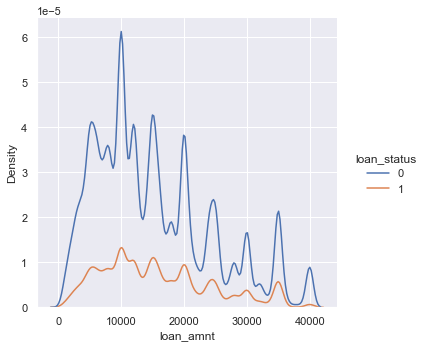

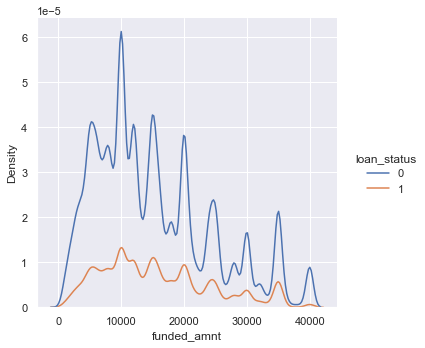

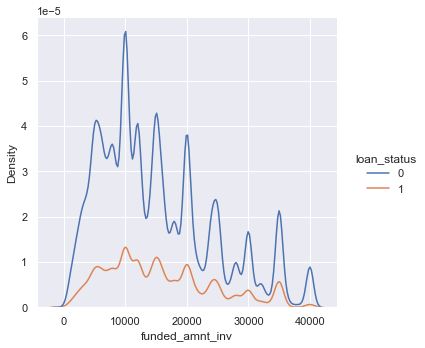

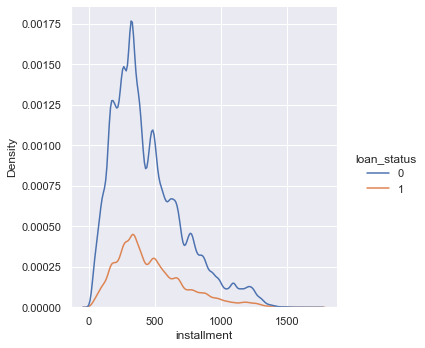

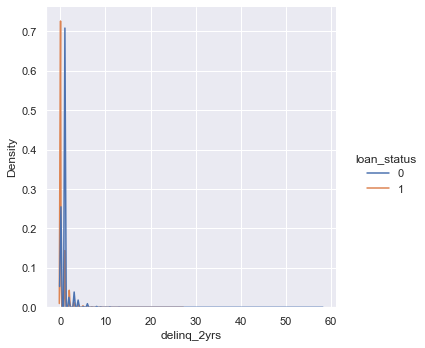

In [ ]:
#KDE Graphs for determing outliers
import seaborn as sns
import numpy as np
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[0:5]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

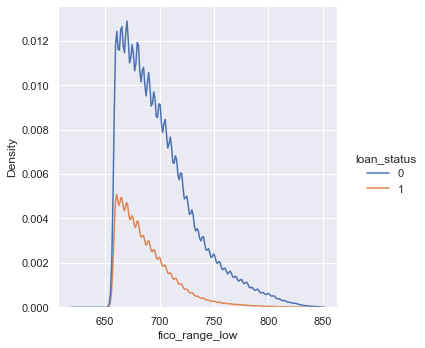

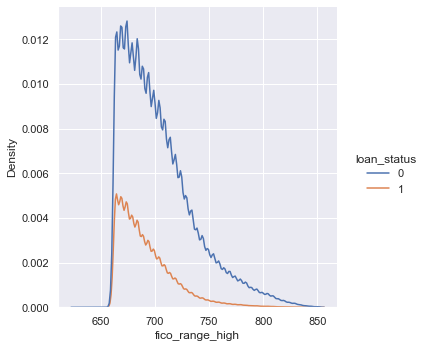

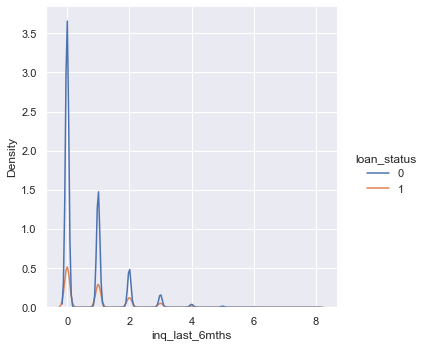

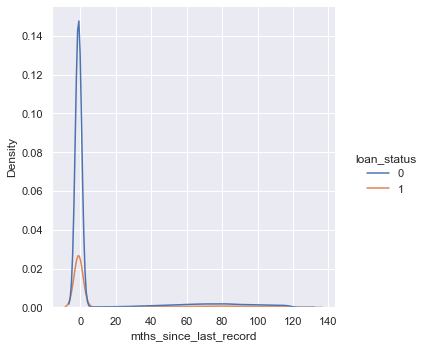

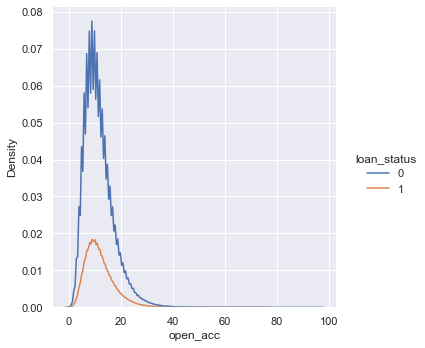

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[5:10]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[10:15]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[15:20]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[20:25]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[25:30]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[30:35]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[35:40]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[40:45]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[45:50]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[50:55]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[55:61]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

In [ ]:
sns.set(color_codes=True)

for col_id in num_df.columns[np.r_[61:68]]:
    sns.displot(data = num_df, x = col_id, hue = "loan_status", kind = 'kde')

## 1.3 Dealing with outliers

In [ ]:
#clean data
dfnew = new_original.copy()

In [ ]:
#list of variables that need outlier handling
col_outlier = ['delinq_2yrs','mths_since_last_record','open_acc','pub_rec',
 'revol_bal','revol_util','total_acc','tot_coll_amt','tot_cur_bal',
 'open_act_il','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util',
 'open_rv_12m','open_rv_24m','all_util','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths',
 'avg_cur_bal','bc_open_to_buy','mo_sin_old_il_acct','mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl','mort_acc','mths_since_recent_revol_delinq','num_accts_ever_120_pd',
 'mths_since_recent_bc_dlq','mths_since_recent_bc','num_bc_sats','num_bc_tl','num_il_tl',
 'num_sats','num_op_rev_tl','num_rev_accts','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit',
 'total_il_high_credit_limit','combined_annual_income','dtl']

In [ ]:
# Loop through the columns and replace values above the 75% percentile with the 75% percentile value
for col in col_outlier:
    quantile_75 = dfnew[col].quantile(0.75)
    if quantile_75 != 0:
      dfnew[col] = dfnew[col].apply(lambda x: quantile_75 if x > quantile_75 else x)


In [ ]:
dfnew.shape

(1280615, 73)

# 2.WOE Transformation

In [ ]:
!pip install git+https://github.com/CBravoR/scorecardpy

  Cloning https://github.com/CBravoR/scorecardpy to c:\users\gavin\appdata\local\temp\pip-req-build-167vbfp6
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce


  Running command git clone -q https://github.com/CBravoR/scorecardpy 'C:\Users\Gavin\AppData\Local\Temp\pip-req-build-167vbfp6'


## 2.1 Split data

In [ ]:
# Split in train and test BEFORE we apply WoE
# Use your Student ID as seed!
train, test = sc.split_df(dfnew,
                          y = 'default_status',
                          ratio = 0.7,
                          seed = 20230331).values()

In [ ]:
train.shape

(896430, 73)

In [ ]:
#train.to_csv("train.csv", index = False)
#test.to_csv("test.csv", index = False)
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## 2.2 Bins

In [ ]:
logis_train=train.copy()
logis_test=test.copy()

In [ ]:
#Creating the bins for the train, test
bins = sc.woebin(logis_train, y = 'default_status', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...


D:\US\2\New Folder\lib\site-packages\scorecardpy\condition_fun.py:19: UserWarning: There are 2 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: mths_since_last_record, mths_since_recent_bc_dlq)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))
D:\US\2\New Folder\lib\site-packages\scorecardpy\condition_fun.py:28: UserWarning: There are 1 date/time type columns are removed from input dataset. 
 (ColumnNames: earliest_cr_line)
  warnings.warn("There are {} date/time type columns are removed from input dataset. \n (ColumnNames: {})".format(len(datetime_cols), ', '.join(datetime_cols)))


Binning on 896430 rows and 70 columns in 00:02:11


In [ ]:
iv_before=sc.iv(logis_train,'default_status')

In [ ]:
iv_before.loc[iv_before['info_value']<0.02]


variable  info_value
59                     open_il_12m    0.018674
55                  pct_tl_nvr_dlq    0.016257
43                        mort_acc    0.014990
12                         pub_rec    0.011022
7               mo_sin_old_il_acct    0.009834
54                   num_op_rev_tl    0.009819
44                        num_sats    0.007997
18                   num_rev_accts    0.007851
8                   num_actv_bc_tl    0.006347
22                        open_acc    0.006113
14            pub_rec_bankruptcies    0.005523
64                      emp_length    0.004195
58                     delinq_2yrs    0.004069
48                       num_bc_tl    0.003822
47           num_accts_ever_120_pd    0.003739
62                       total_acc    0.003513
67  mths_since_recent_revol_delinq    0.002848
5                        tax_liens    0.002809
33                       num_il_tl    0.001773
65                     num_bc_sats    0.000907
25        chargeoff_within_12_mths    0.000194
41          mths_since_last_record    0.000000
24        mths_since_recent_bc_dlq    0.000000

D:\US\2\New Folder\lib\site-packages\scorecardpy\woebin.py:1225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


{'mo_sin_old_rev_tl_op': <Figure size 720x360 with 2 Axes>,
 'open_act_il': <Figure size 720x360 with 2 Axes>,
 'open_rv_24m': <Figure size 720x360 with 2 Axes>,
 'tot_coll_amt': <Figure size 720x360 with 2 Axes>,
 'inq_last_6mths': <Figure size 720x360 with 2 Axes>,
 'tax_liens': <Figure size 720x360 with 2 Axes>,
 'num_rev_tl_bal_gt_0': <Figure size 720x360 with 2 Axes>,
 'mo_sin_old_il_acct': <Figure size 720x360 with 2 Axes>,
 'num_actv_bc_tl': <Figure size 720x360 with 2 Axes>,
 'revol_bal': <Figure size 720x360 with 2 Axes>,
 'revol_util': <Figure size 720x360 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 720x360 with 2 Axes>,
 'pub_rec': <Figure size 720x360 with 2 Axes>,
 'dtl': <Figure size 720x360 with 2 Axes>,
 'pub_rec_bankruptcies': <Figure size 720x360 with 2 Axes>,
 'mo_sin_rcnt_rev_tl_op': <Figure size 720x360 with 2 Axes>,
 'fico_range_high': <Figure size 720x360 with 2 Axes>,
 'mths_since_rcnt_il': <Figure size 720x360 with 2 Axes>,
 'num_rev_accts': <Figure si

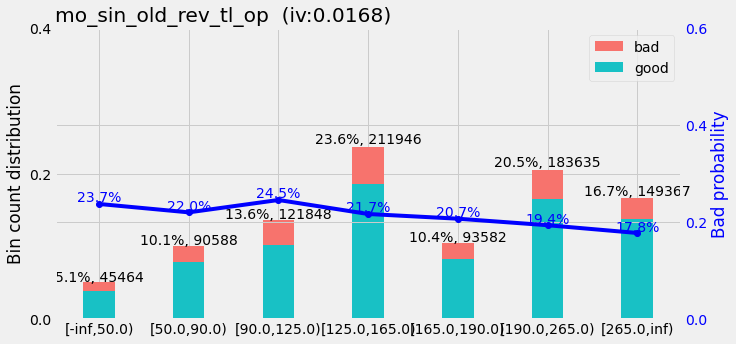

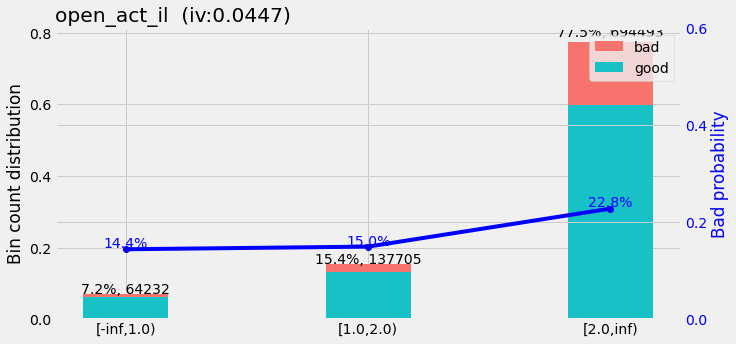

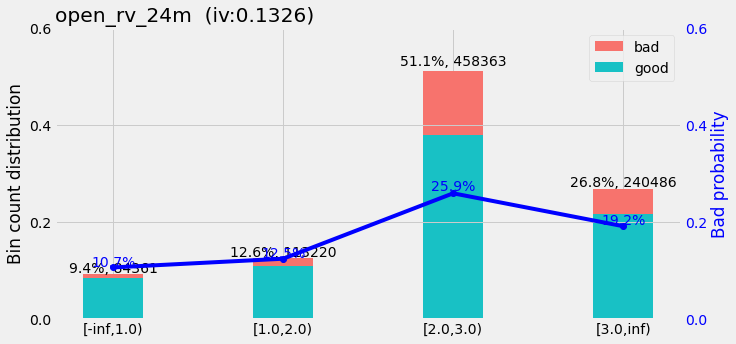

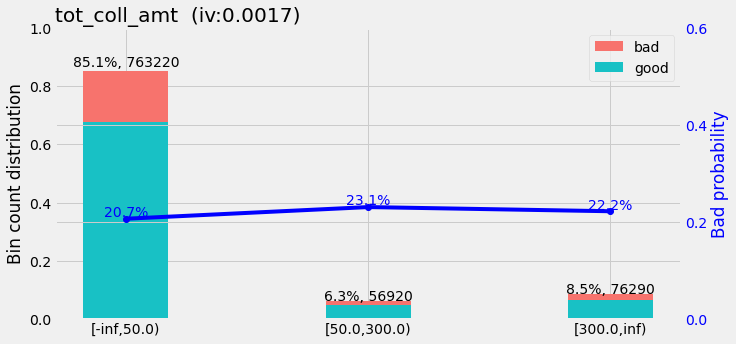

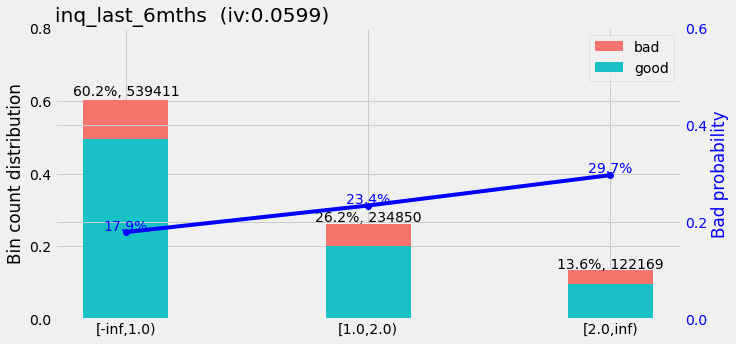

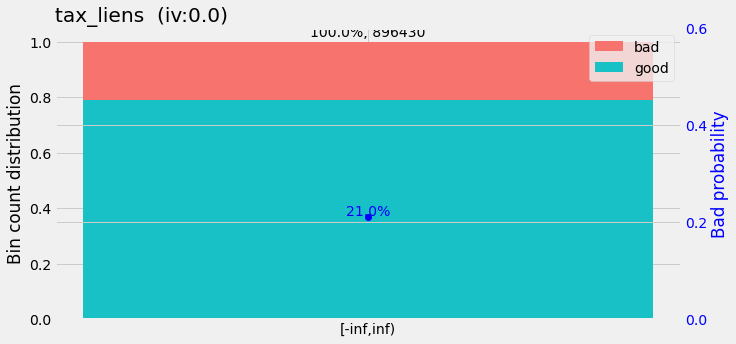

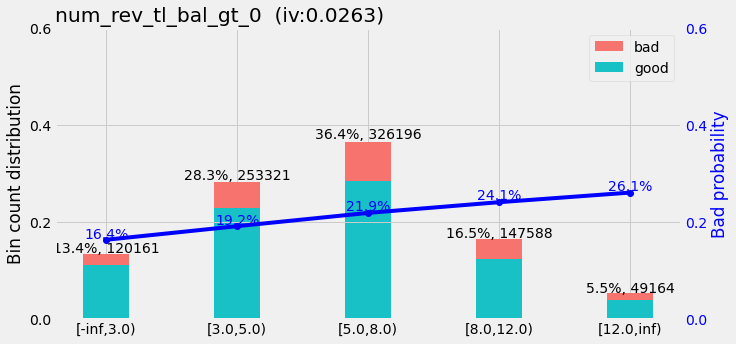

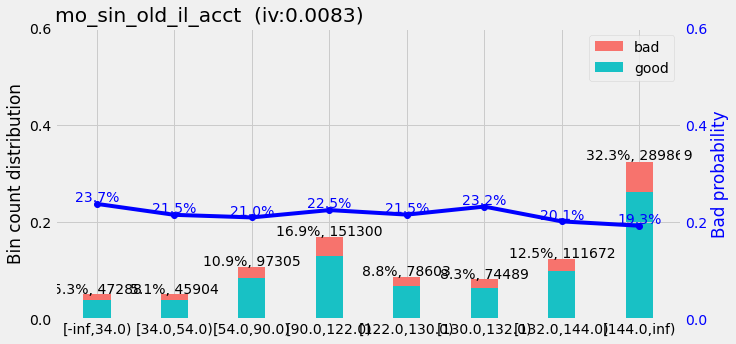

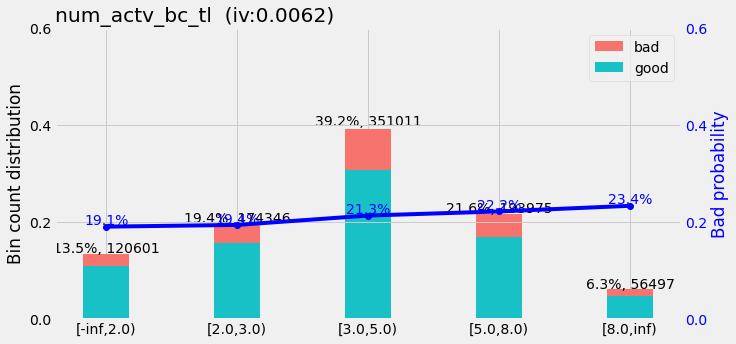

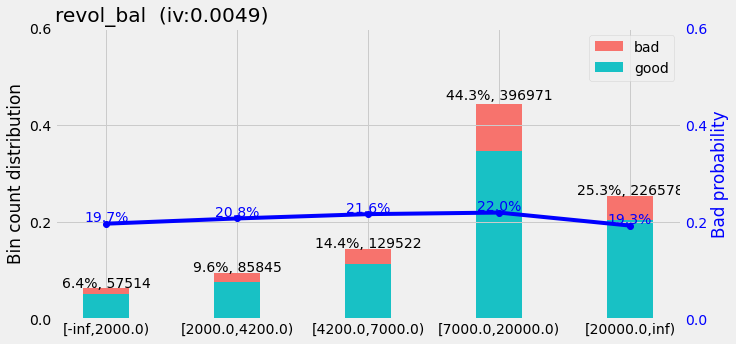

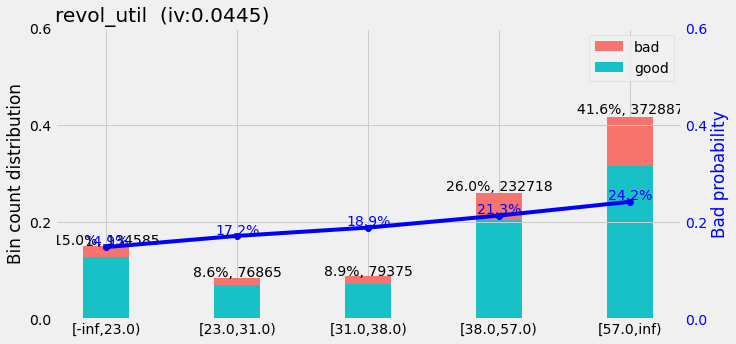

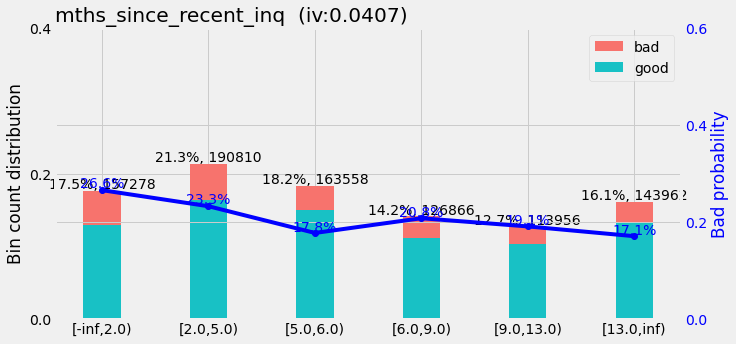

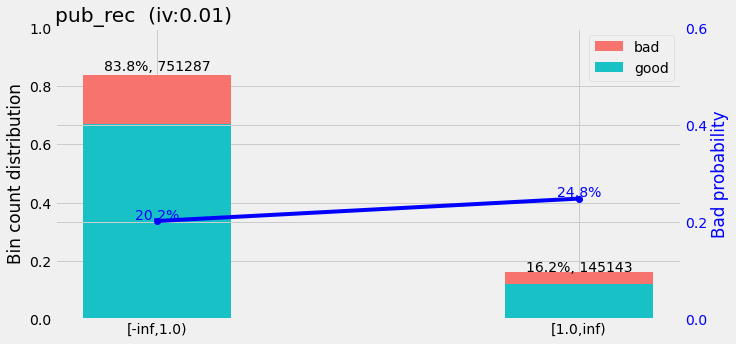

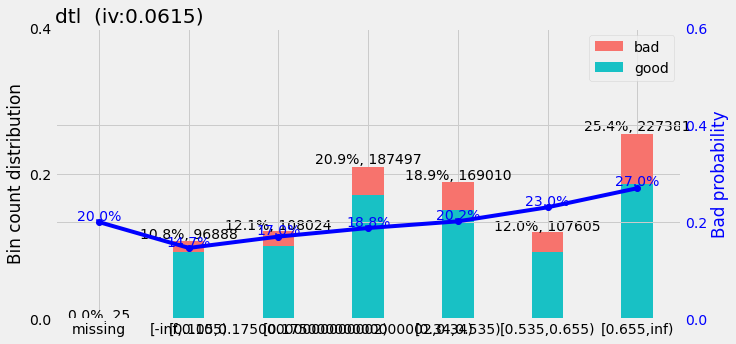

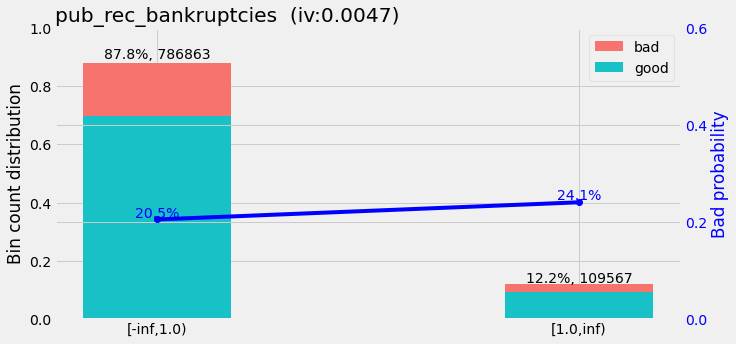

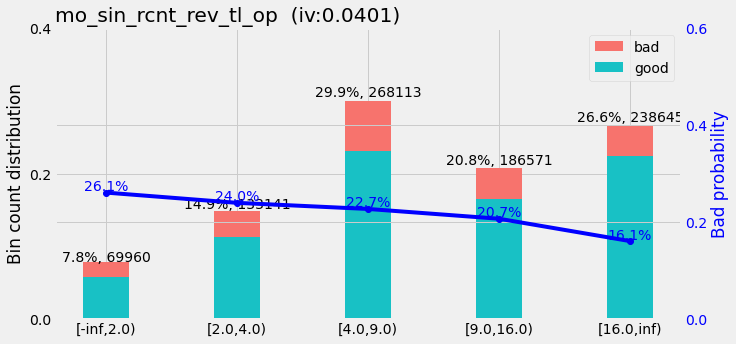

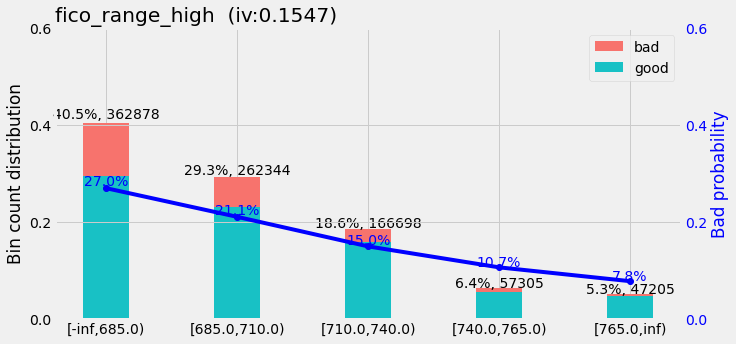

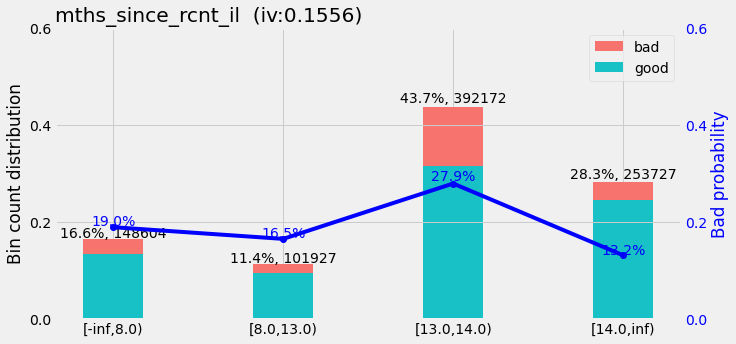

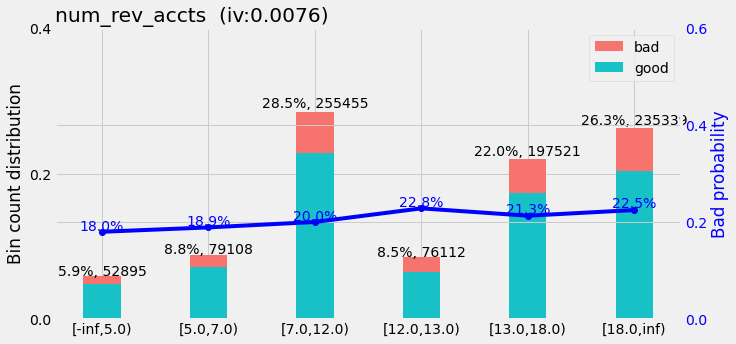

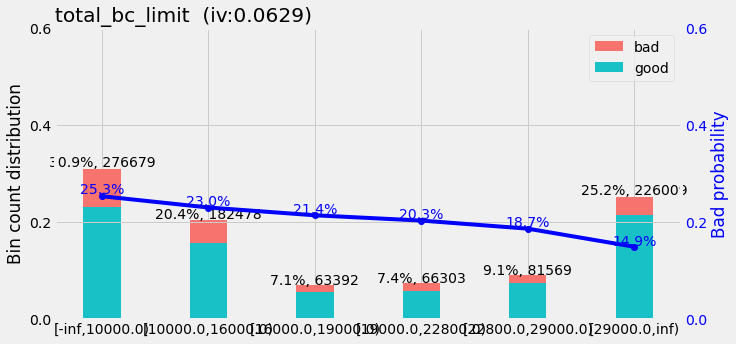

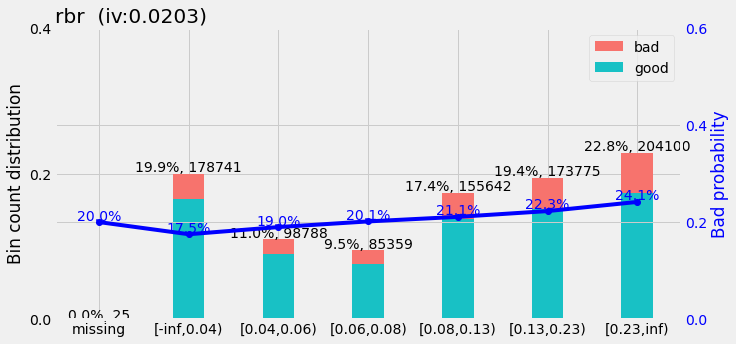

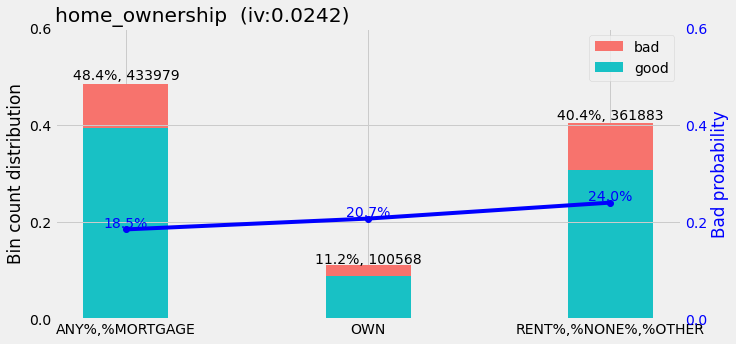

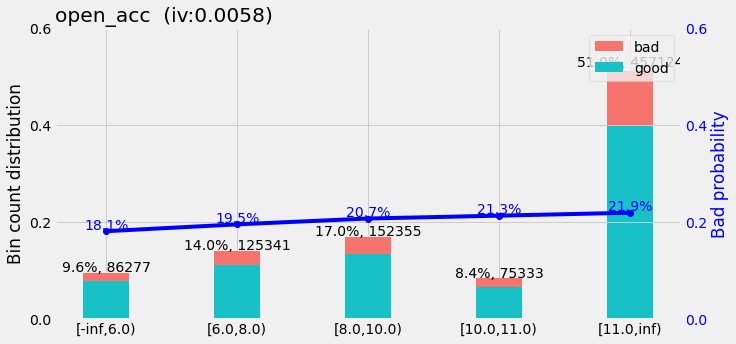

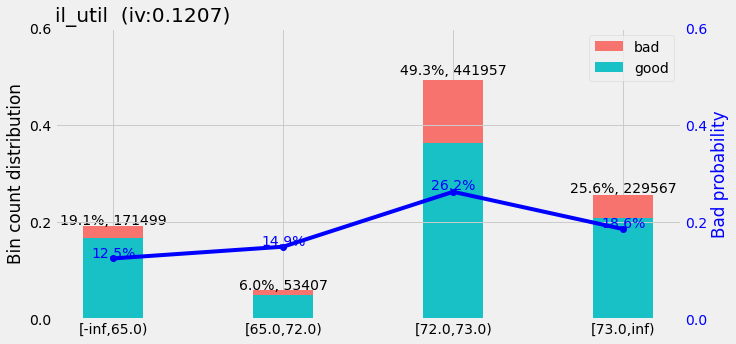

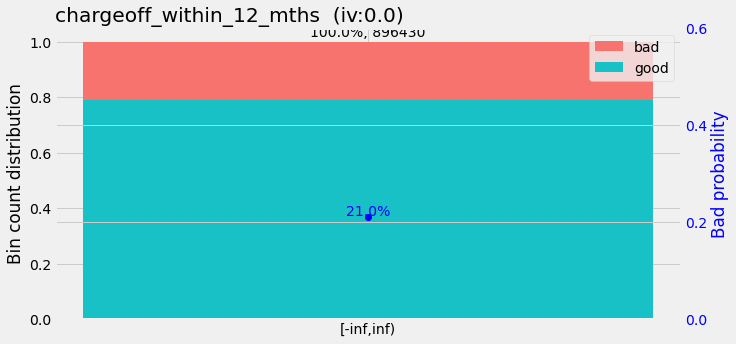

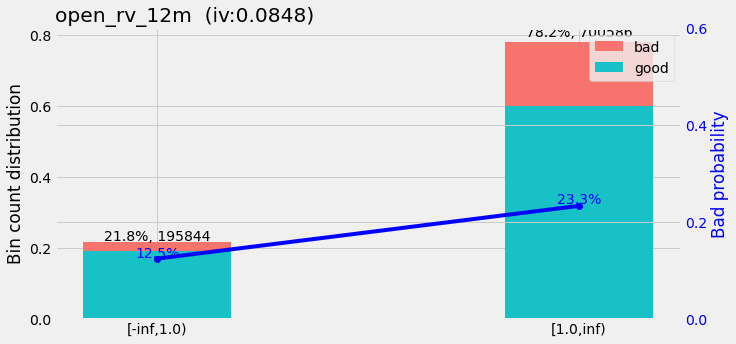

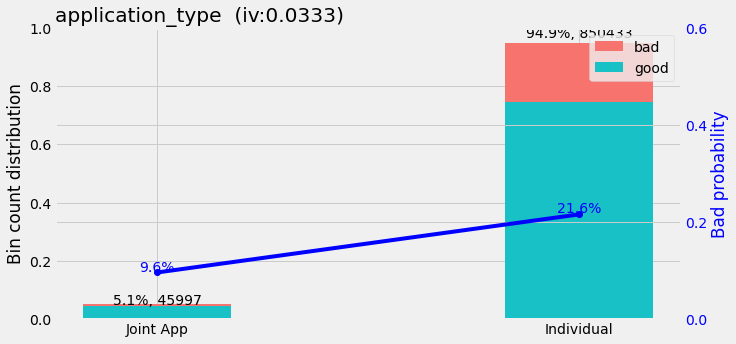

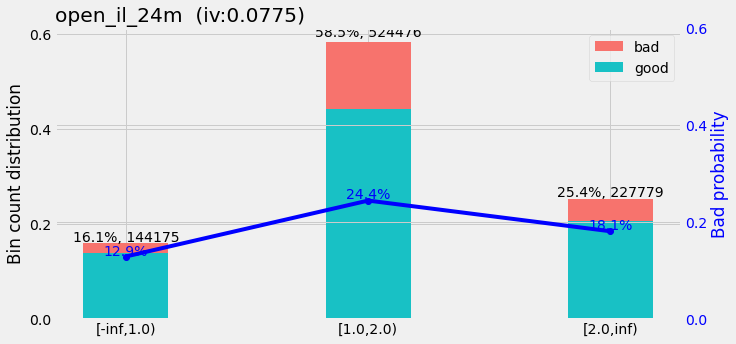

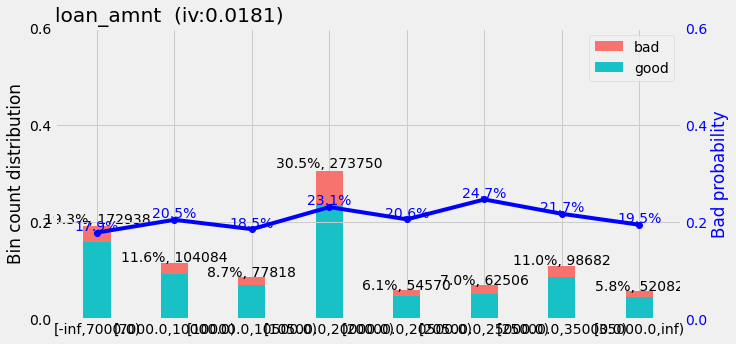

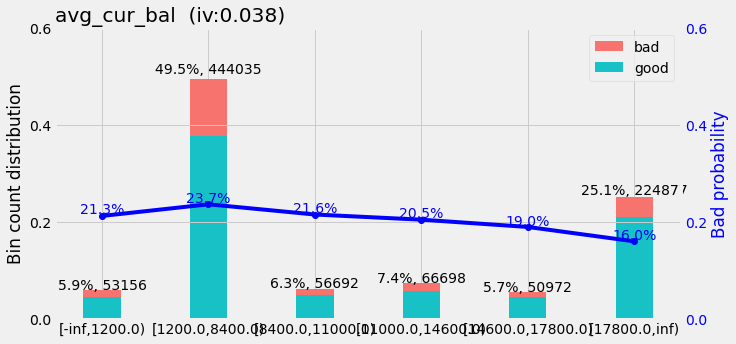

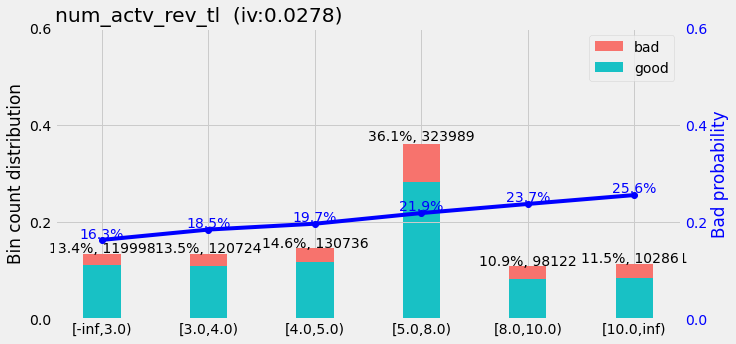

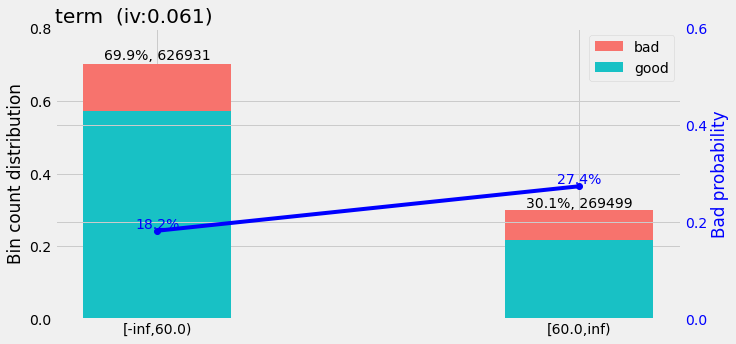

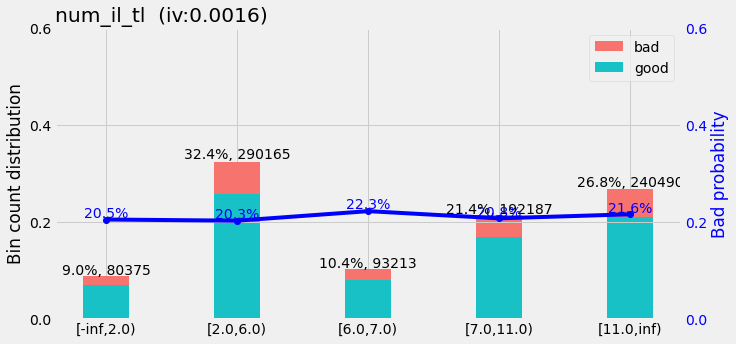

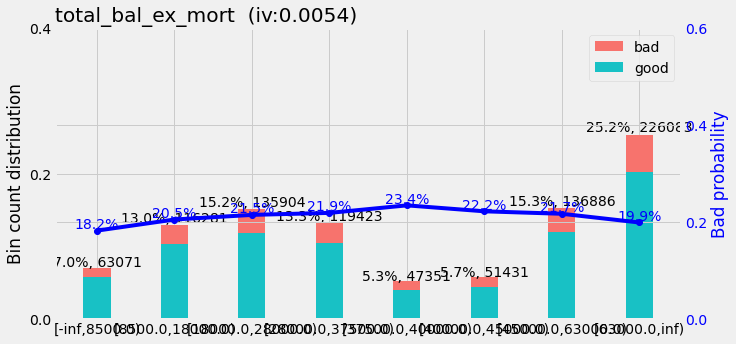

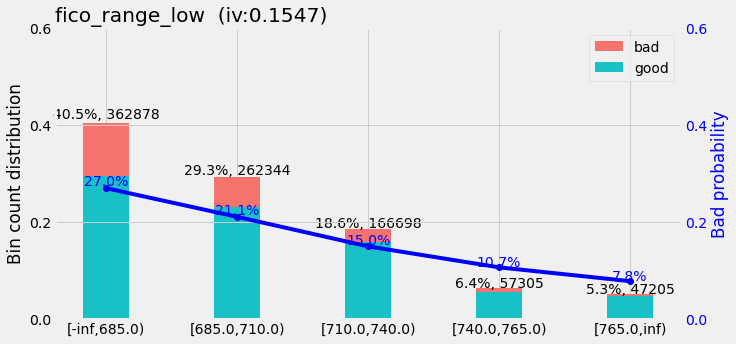

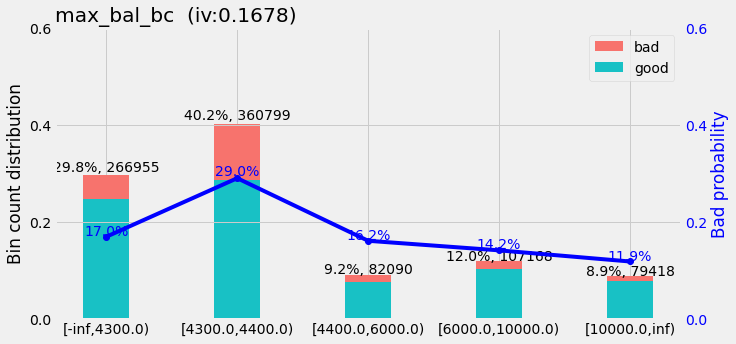

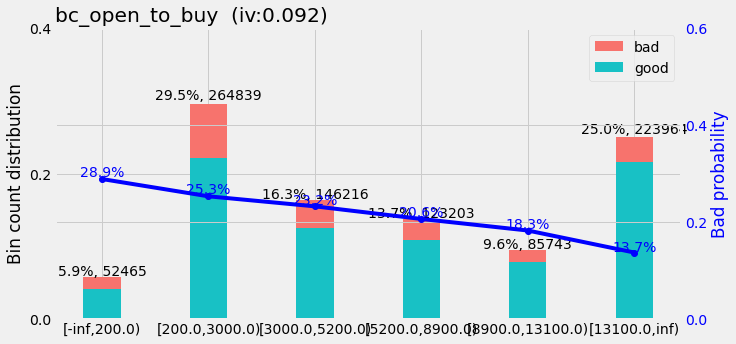

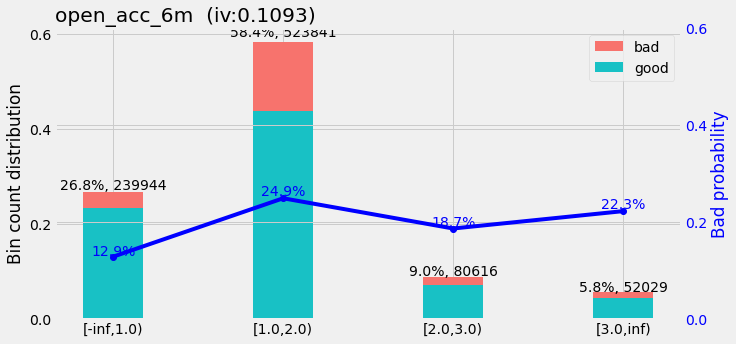

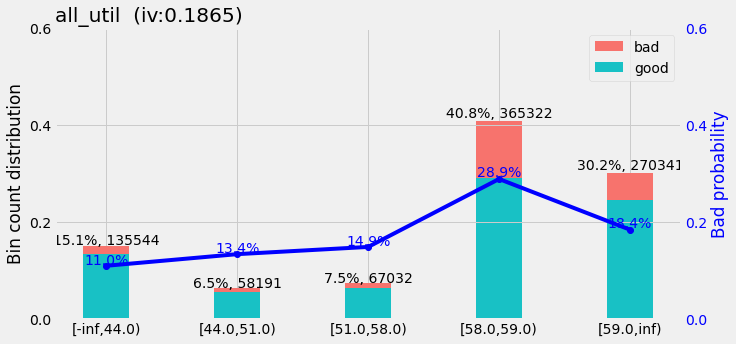

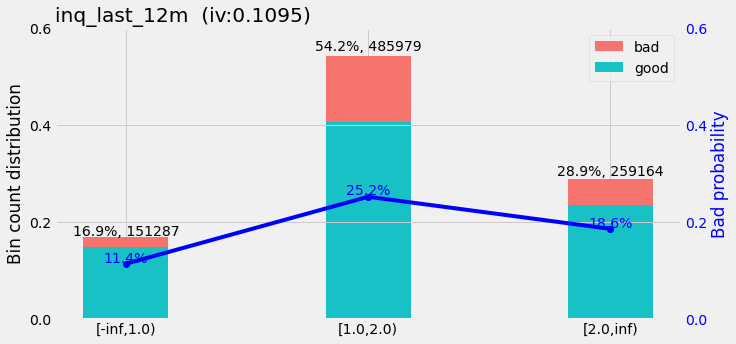

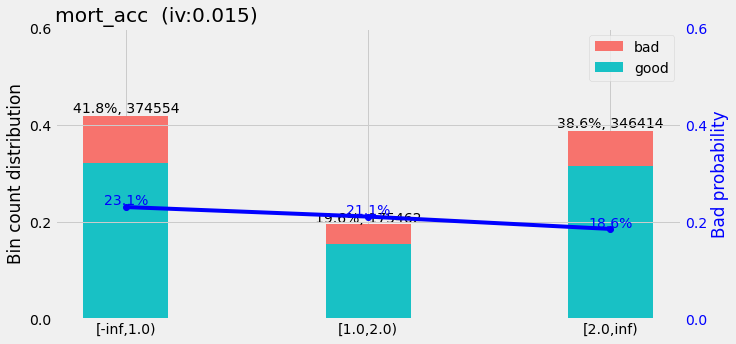

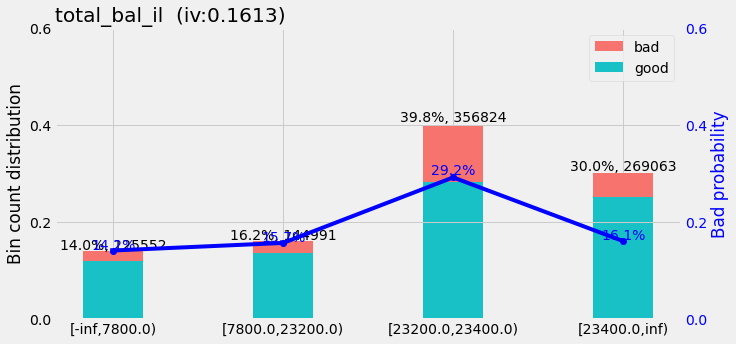

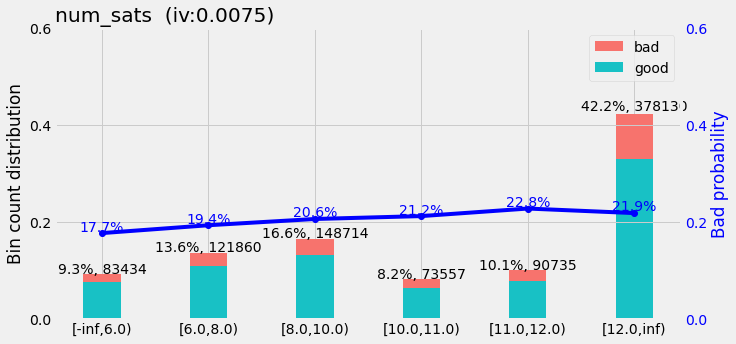

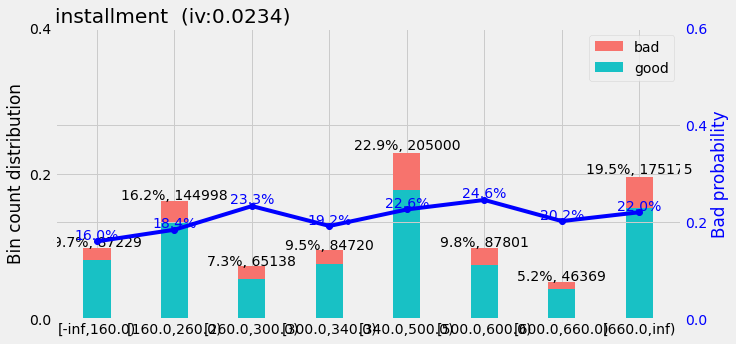

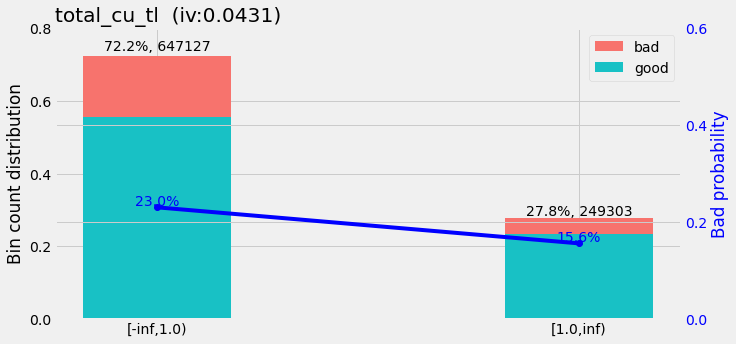

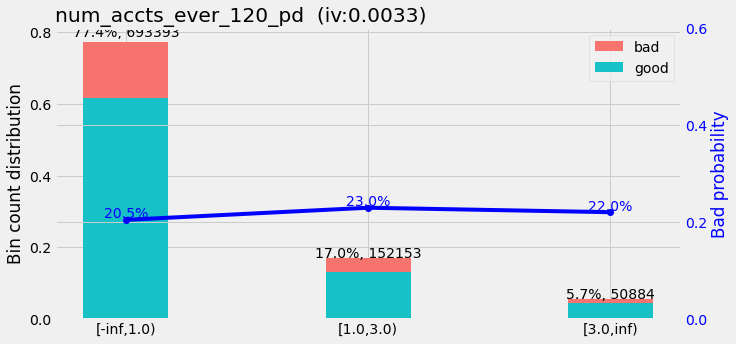

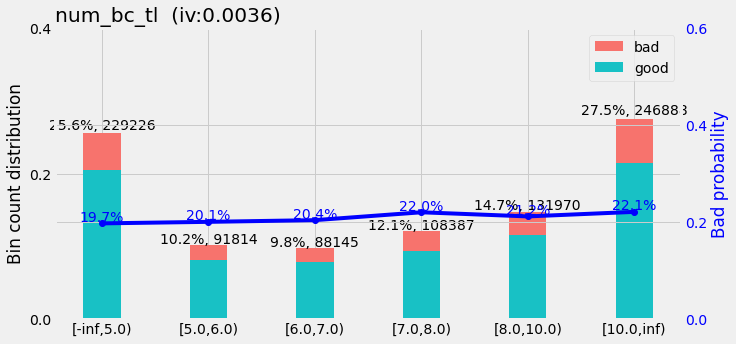

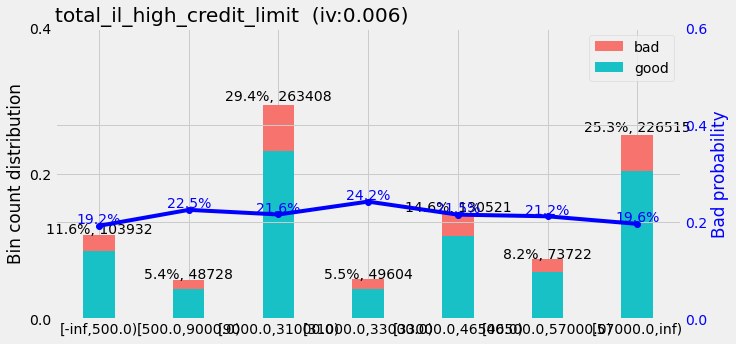

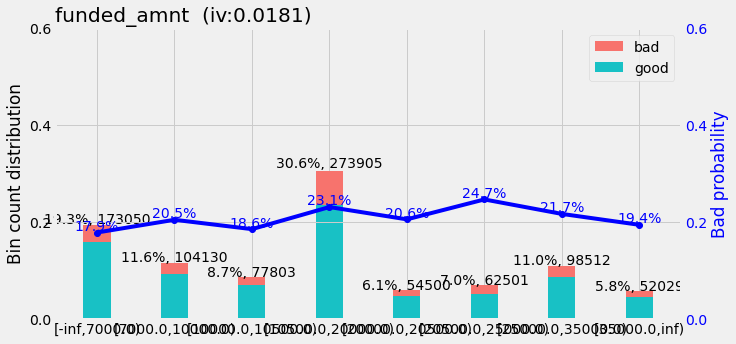

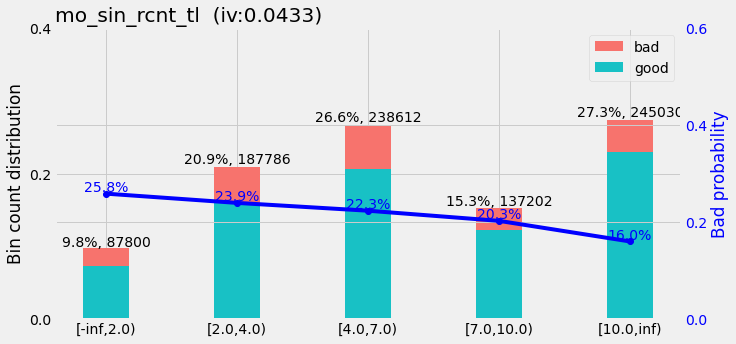

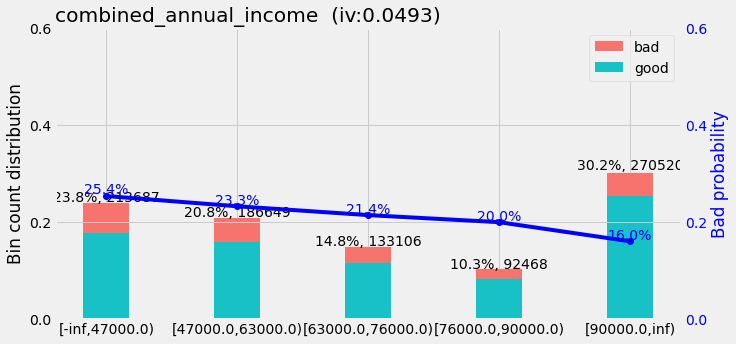

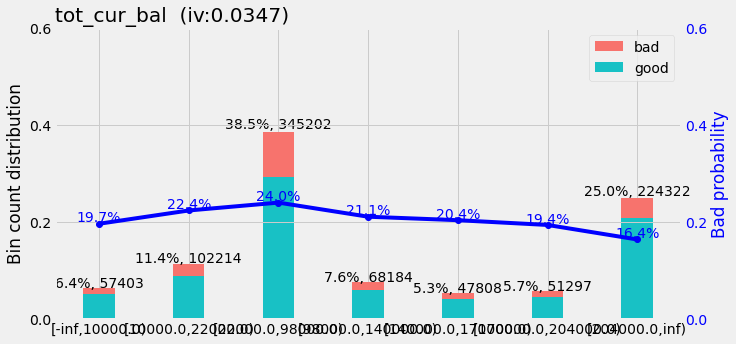

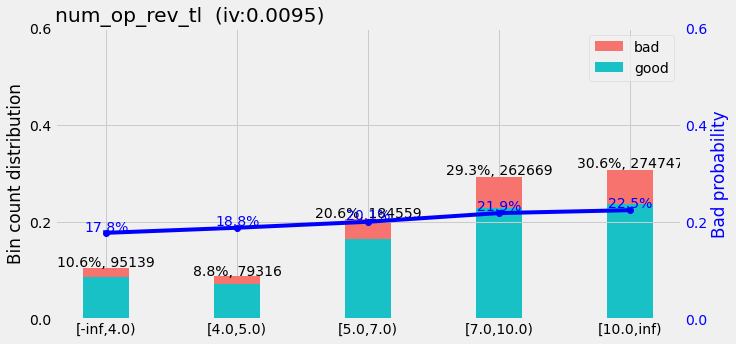

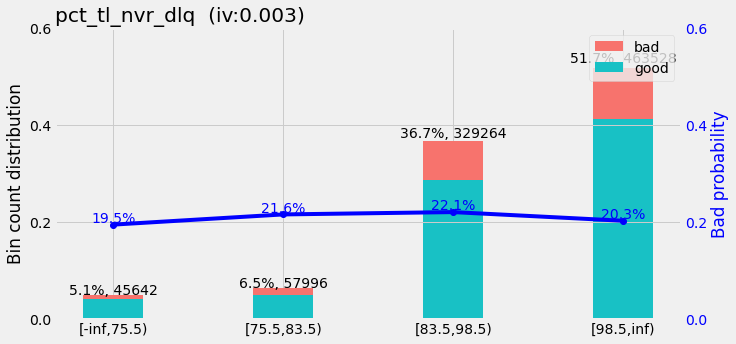

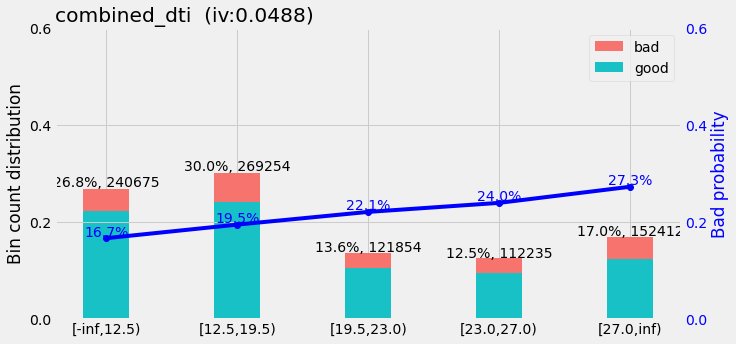

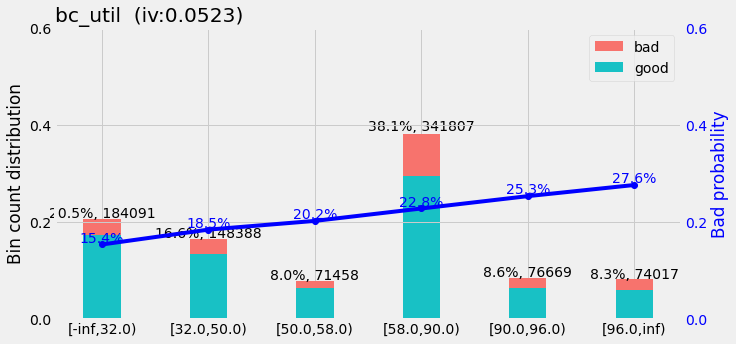

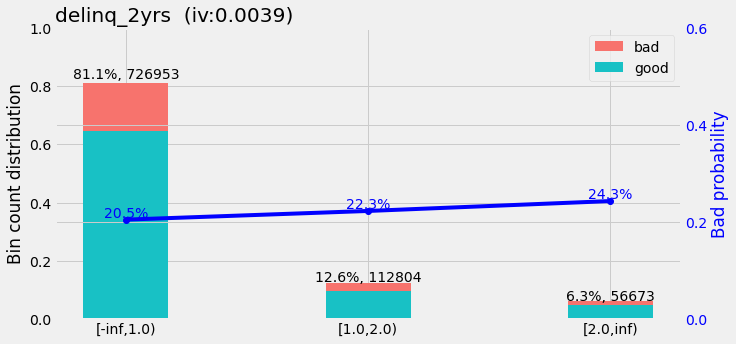

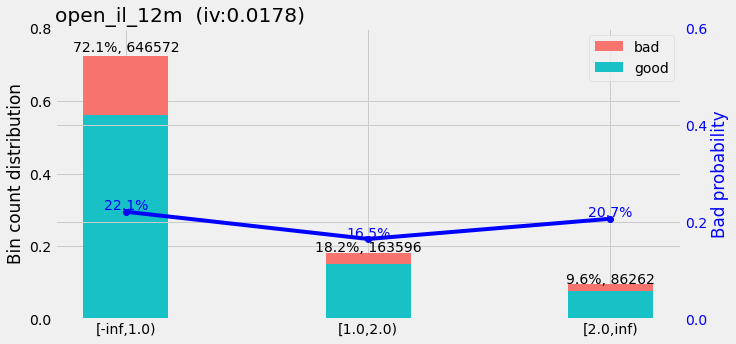

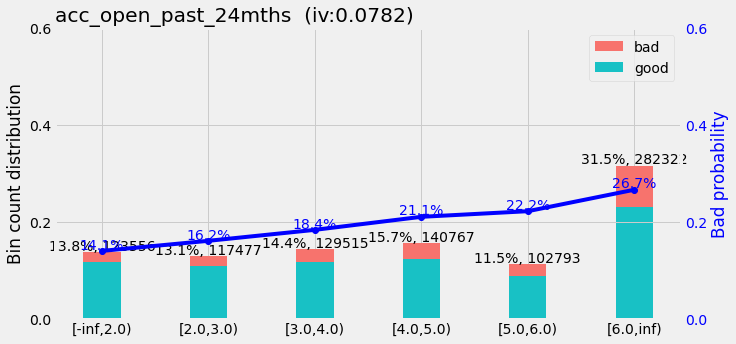

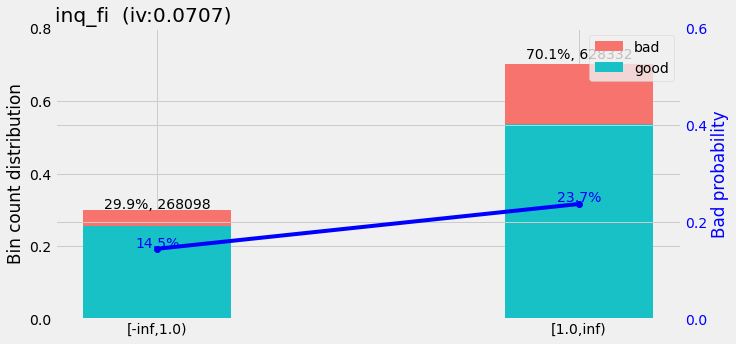

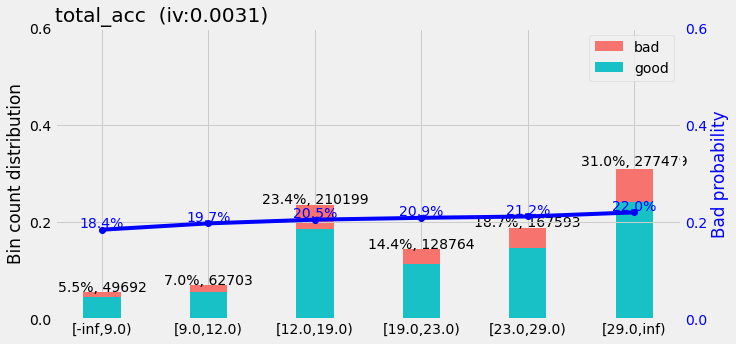

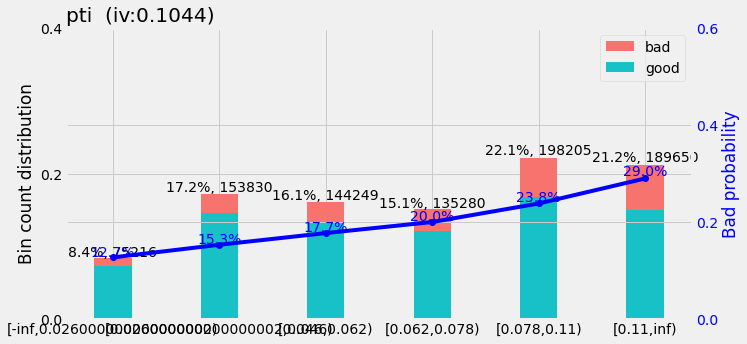

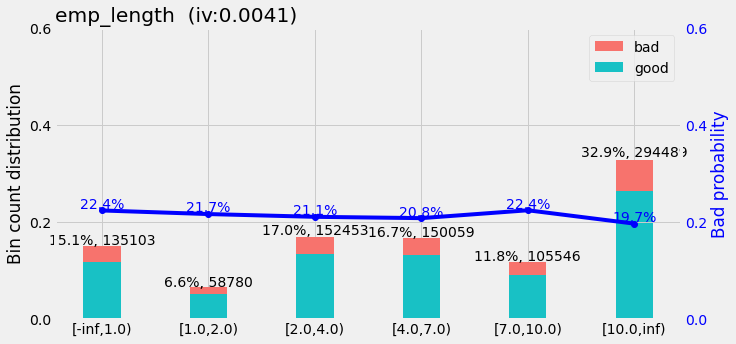

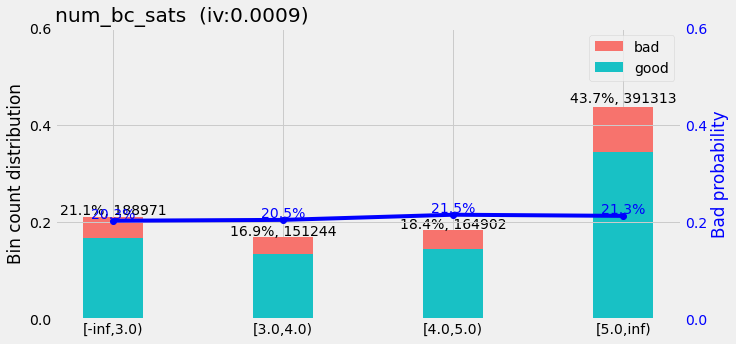

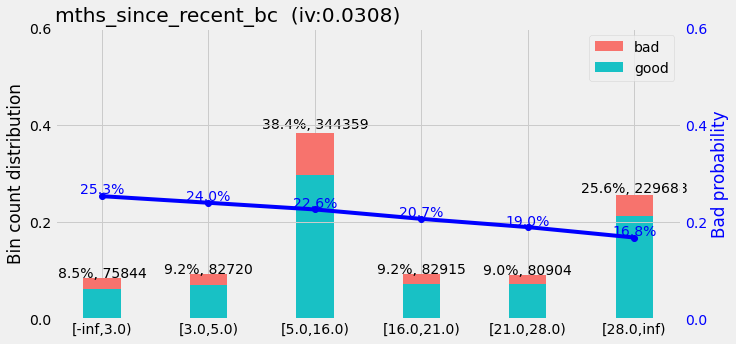

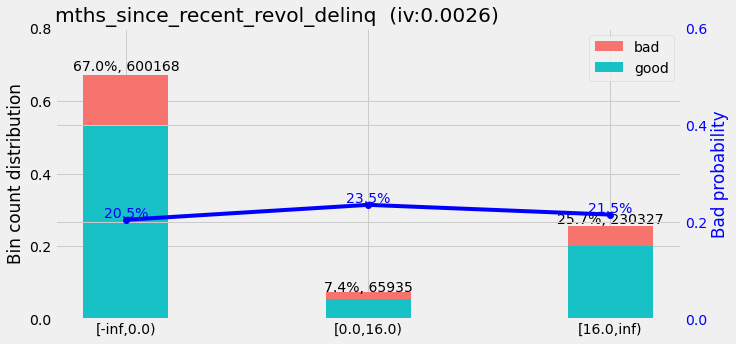

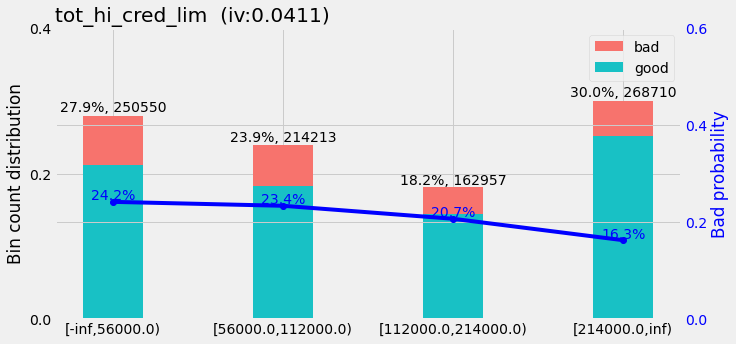

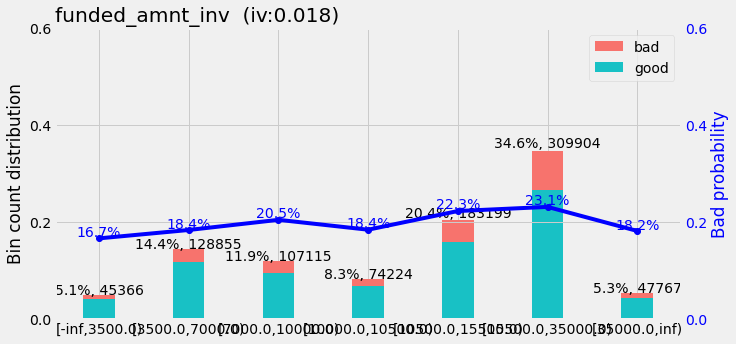

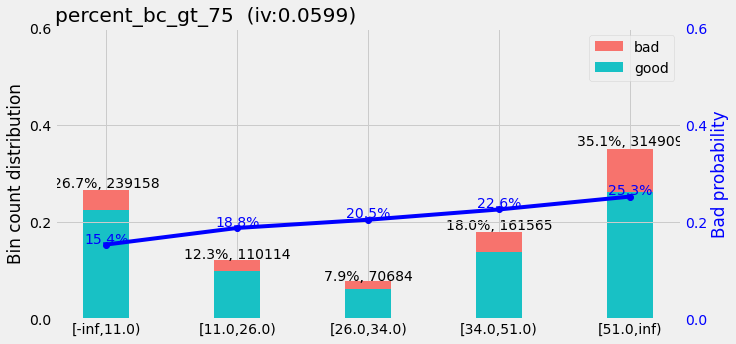

In [ ]:
sc.woebin_plot(bins)

After check the graphs, and the information score, we drop those variables with iv score below 0.02 and anomalous trend

In [ ]:
logis_train = train.drop(['mort_acc','num_bc_tl','pct_tl_nvr_dlq','num_op_rev_tl','funded_amnt','num_il_tl','total_bal_ex_mort','pub_rec_bankruptcies',
                    'chargeoff_within_12_mths',
'loan_amnt','num_rev_accts','total_il_high_credit_limit','funded_amnt_inv','mths_since_recent_revol_delinq',
'num_sats','num_accts_ever_120_pd','open_acc','num_bc_sats','open_il_12m','num_actv_bc_tl','mo_sin_old_rev_tl_op',
'delinq_2yrs','tax_liens','total_acc','emp_length','mo_sin_old_il_acct','revol_bal','pub_rec','tot_coll_amt'],axis=1)

In [ ]:
logis_test = test.drop(['mort_acc','num_bc_tl','pct_tl_nvr_dlq','num_op_rev_tl','funded_amnt','num_il_tl','total_bal_ex_mort','pub_rec_bankruptcies',
                  'chargeoff_within_12_mths',
'loan_amnt','num_rev_accts','total_il_high_credit_limit','funded_amnt_inv','mths_since_recent_revol_delinq',
'num_sats','num_accts_ever_120_pd','open_acc','num_bc_sats','open_il_12m','num_actv_bc_tl','mo_sin_old_rev_tl_op',
'delinq_2yrs','tax_liens','total_acc','emp_length','mo_sin_old_il_acct','revol_bal','pub_rec','tot_coll_amt'],axis=1)

## 2.2 Manual adjusting

In [ ]:
bins2 = sc.woebin(logis_train, y = 'default_status', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree'
                 )

## 2.3 New Bins


In [ ]:
breaks_adj = sc.woebin_adj(logis_train,"default_status",bins2,adj_all_var=True)

In [ ]:
breaks_adj

In [ ]:
breaks_adj_record = {'acc_open_past_24mths': [2.0,3.0,4.0,5.0,6.0], 'all_util': [44.0,51.0,58.0], 
                     'application_type': ['Joint App','Individual'], 'avg_cur_bal': [8400.0,11000.0,14600.0,17800.0 ], 
                     'bc_open_to_buy': [200.0,3000.0,5200.0,8900.0,13100.0], 'bc_util': [32.0,50.0,58.0,90.0,96.0], 
                     'combined_annual_income': [47000.0,63000.0,76000.0,90000.0], 'combined_dti': [12.5,19.5,23.0,27.0], 
                     'dtl': [0.105,0.17500000000000002,0.34,0.535,0.655 ], 'fico_range_high': [685.0,710.0,740.0,765.0], 
                     'fico_range_low': [685.0,710.0,740.0,765.0], 'home_ownership': ['ANY%,%MORTGAGE','OWN','RENT%,%NONE%,%OTHER'], 
                     'il_util': [65,72], 'inq_fi': [1.0], 'inq_last_12m': [1,2], 'inq_last_6mths': [1.0,2.0], 'installment': [160.0,300.0,500.0,660.0 ], 
                     'max_bal_bc': [4400,6000,10000], 'mo_sin_rcnt_rev_tl_op': [2.0,4.0,9.0,16.0], 'mo_sin_rcnt_tl': [2.0,4.0,7.0,10.0], 
                     'mths_since_rcnt_il': [8,13], 'mths_since_recent_bc': [3.0,5.0,16.0,21.0,28.0], 'mths_since_recent_inq': [2.0,5.0,9.0,13.0 ], 
                     'num_actv_rev_tl': [3.0,4.0,5.0,8.0,10.0], 'num_rev_tl_bal_gt_0': [3.0,5.0,8.0,12.0], 'open_acc_6m': [1.0,1.5,2.0,3.0 ], 
                     'open_act_il': [1.0,2.0], 'open_il_24m': [2], 'open_rv_12m': [1.0], 'open_rv_24m': [1,2], 'percent_bc_gt_75': [11.0,26.0,34.0,51.0], 
                     'pti': [0.026000000000000002,0.046,0.062,0.078,0.11], 'rbr': [0.04,0.06,0.08,0.13,0.23], 'revol_util': [23.0,31.0,38.0,57.0], 
                     'term': [60.0], 'tot_cur_bal': [170000.0, 204000.0, 10000.0], 'tot_hi_cred_lim': [56000.0,112000.0,214000.0], 
                     'total_bal_il': [7800.0,23200.0,23400.0 ], 'total_bc_limit': [10000.0,16000.0,19000.0,22800.0,29000.0], 'total_cu_tl': [1.0]}

## 2.4 Train 
Train with manual adjust bins

In [ ]:
bins_adj = sc.woebin(train, y= 'default_status',breaks_list=breaks_adj_record)
train_woe = sc.woebin_ply(logis_train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(logis_test, bins_adj) # Calculate WoE dataset (test)

[INFO] creating woe binning ...


D:\US\2\New Folder\lib\site-packages\scorecardpy\condition_fun.py:19: UserWarning: There are 2 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: mths_since_last_record, mths_since_recent_bc_dlq)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))
D:\US\2\New Folder\lib\site-packages\scorecardpy\condition_fun.py:28: UserWarning: There are 1 date/time type columns are removed from input dataset. 
 (ColumnNames: earliest_cr_line)
  warnings.warn("There are {} date/time type columns are removed from input dataset. \n (ColumnNames: {})".format(len(datetime_cols), ', '.join(datetime_cols)))


Binning on 896430 rows and 70 columns in 00:01:40
[INFO] converting into woe values ...
Woe transformating on 896430 rows and 40 columns in 00:00:45
[INFO] converting into woe values ...
Woe transformating on 384185 rows and 40 columns in 00:00:20


## 2.5 IV score
Use IV score to drop variables

In [ ]:
sc.iv(train_woe, 'default_status')

variable  info_value
26            total_bal_il_woe    0.161272
5          fico_range_high_woe    0.154732
39          fico_range_low_woe    0.154732
16                all_util_woe    0.125867
28            inq_last_12m_woe    0.109450
37             open_acc_6m_woe    0.109264
19             open_rv_24m_woe    0.105720
24                     pti_woe    0.104382
40          bc_open_to_buy_woe    0.092013
3                  il_util_woe    0.087396
0               max_bal_bc_woe    0.085480
12             open_rv_12m_woe    0.084837
13    acc_open_past_24mths_woe    0.078195
2                   inq_fi_woe    0.070666
21          total_bc_limit_woe    0.062896
6                      dtl_woe    0.061512
32                    term_woe    0.060969
20          inq_last_6mths_woe    0.059896
25        percent_bc_gt_75_woe    0.059869
9                  bc_util_woe    0.052331
29  combined_annual_income_woe    0.049306
18            combined_dti_woe    0.048772
10             open_act_il_woe    0.044719
42              revol_util_woe    0.044460
22          mo_sin_rcnt_tl_woe    0.043346
41             total_cu_tl_woe    0.043144
36         tot_hi_cred_lim_woe    0.041071
30   mo_sin_rcnt_rev_tl_op_woe    0.040080
33   mths_since_recent_inq_woe    0.037725
4              avg_cur_bal_woe    0.037002
17        application_type_woe    0.033280
38             tot_cur_bal_woe    0.031153
15    mths_since_recent_bc_woe    0.030754
27         num_actv_rev_tl_woe    0.027759
35     num_rev_tl_bal_gt_0_woe    0.026284
7             earliest_cr_line    0.025948
31          home_ownership_woe    0.024249
8                      rbr_woe    0.020331
11      mths_since_rcnt_il_woe    0.014893
34             installment_woe    0.013999
23             open_il_24m_woe    0.010515
14      mths_since_last_record    0.000000
1     mths_since_recent_bc_dlq    0.000000

In [ ]:
#dropped
drop_list_aftercheck_iv = ['mths_since_rcnt_il_woe','installment_woe','open_il_24m_woe'	,
                           'mths_since_recent_bc_dlq','mths_since_last_record','earliest_cr_line']

In [ ]:
train_woe.drop(drop_list_aftercheck_iv, axis=1,inplace = True )

In [ ]:
test_woe.drop(drop_list_aftercheck_iv, axis=1,inplace = True )

## 2.6 Correlation
Remove variables that are correlated to each others

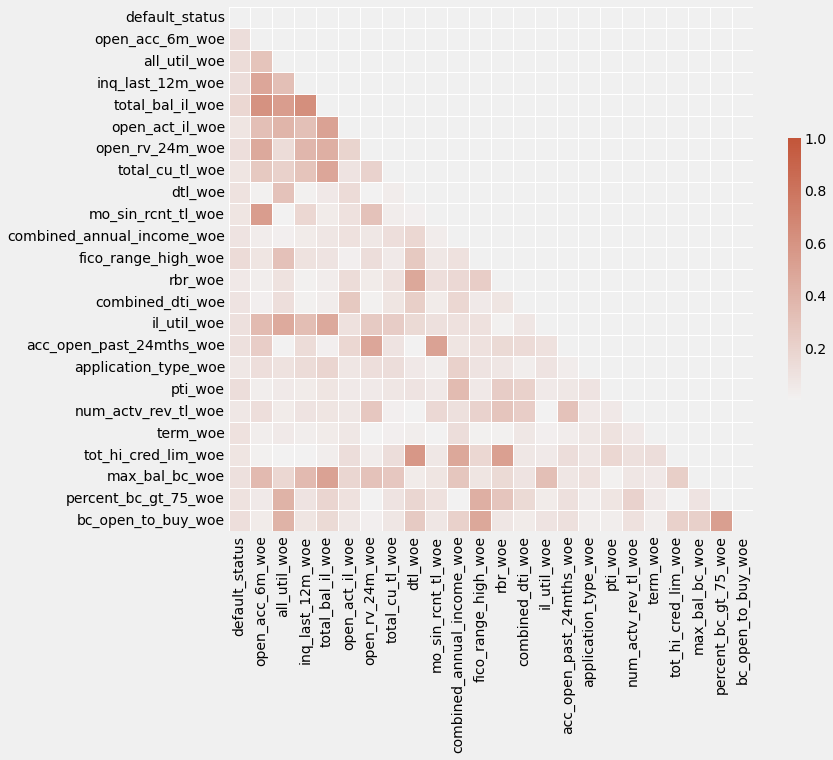

In [ ]:
# Compute the correlation matrix
corr = train_woe.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

In [ ]:
## dropping list for high correlated variables
drop_list_aftercorr = ['num_rev_tl_bal_gt_0_woe','fico_range_low_woe','tot_cur_bal_woe',
                       'bc_util_woe','total_bc_limit_woe','revol_util_woe','avg_cur_bal_woe',
                       'mo_sin_rcnt_rev_tl_op_woe','inq_last_6mths_woe','mths_since_recent_inq_woe',
                       'open_rv_12m_woe','mths_since_recent_bc_woe','home_ownership_woe','inq_fi_woe'
                      ]

In [ ]:
test_woe.drop(drop_list_aftercorr, axis=1,inplace=True)
train_woe.drop(drop_list_aftercorr, axis=1,inplace=True)

In [ ]:
train_woe.shape

(896430, 24)

## Save Data

In [ ]:
train_woe.to_csv("train_woe.csv", index = False)
test_woe.to_csv("test_woe.csv", index = False)


In [ ]:
dfnew.to_pickle('cleaned_df.pkl')


# 3. Logistic Regression

In [ ]:
#Creating Logistic Regression Model
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(penalty='elasticnet', # Type of penalization l1 = lasso, l2 = ridge, elasticnet
                                     Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.000001, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=20190301, # Random seed
                                     max_iter=500, # Maximum iterations
                                     verbose=2, # Show process. 1 is yes.
                                     solver = 'saga', # How to optimize.
                                     n_jobs = -1,      # Processes to use. Set to number of physical cores. 
                                     refit = True,     # If to retrain with the best parameter and all data after finishing.
                                     l1_ratios = np.arange(0, 1.01, 0.1), # The LASSO / Ridge ratios.
                                     
                                    )

## 3.1 Dealing date data for logistic regression 

## 3.2 Fit data

In [ ]:
logreg.fit(X = train_woe.drop('default_status',axis = 1), # All rows and from the second var to end
                    y = train_woe['default_status'] # The target
                   )

In [ ]:
len(var_importance_coef)

23

# New Section

In [ ]:
#Computing Variable importance for logistic model
coef_magnitude = abs(logreg.coef_[0])
var_importance_coef = coef_magnitude / sum(coef_magnitude)

var_names = ['open_acc_6m_woe', 'all_util_woe', 'inq_last_12m_woe',
       'total_bal_il_woe', 'open_act_il_woe', 'open_rv_24m_woe',
       'total_cu_tl_woe', 'dtl_woe', 'mo_sin_rcnt_tl_woe',
       'combined_annual_income_woe', 'fico_range_high_woe', 'rbr_woe',
       'combined_dti_woe', 'il_util_woe', 'acc_open_past_24mths_woe',
       'application_type_woe', 'pti_woe', 'num_actv_rev_tl_woe', 'term_woe',
       'tot_hi_cred_lim_woe', 'max_bal_bc_woe', 'percent_bc_gt_75_woe',
       'bc_open_to_buy_woe']
var_imp_df = pd.DataFrame({'Variable': var_names,
                           'Importance (coefficient magnitude)': var_importance_coef})
var_imp_df = var_imp_df.sort_values(by=['Importance (coefficient magnitude)'], ascending=False)
print(var_imp_df)

                      Variable  Importance (coefficient magnitude)
18                    term_woe                            0.116978
19         tot_hi_cred_lim_woe                            0.101639
14    acc_open_past_24mths_woe                            0.099633
16                     pti_woe                            0.090579
12            combined_dti_woe                            0.070105
10         fico_range_high_woe                            0.068635
3             total_bal_il_woe                            0.062112
15        application_type_woe                            0.057789
8           mo_sin_rcnt_tl_woe                            0.057289
22          bc_open_to_buy_woe                            0.050538
11                     rbr_woe                            0.043217
4              open_act_il_woe                            0.025288
13                 il_util_woe                            0.024935
21        percent_bc_gt_75_woe                            0.02

In [ ]:
#Save trained logistic regression model into pickle
import pickle

with open('logreg.pkl', 'wb') as f:
    pickle.dump(logreg, f)

In [ ]:
import pickle
with open('logreg.pkl', 'rb') as f:
    logreg = pickle.load(f)

In [ ]:
#Perform prediction using logistic regression
pred_class_test = logreg.predict(test_woe.drop(columns='default_status'))
probs_test = logreg.predict_proba(test_woe.drop(columns="default_status"))
print(probs_test[0:5], pred_class_test[0:5])

[[0.50914154 0.49085846]
 [0.62635683 0.37364317]
 [0.52953609 0.47046391]
 [0.45300674 0.54699326]
 [0.48292688 0.51707312]] [0 0 0 1 1]


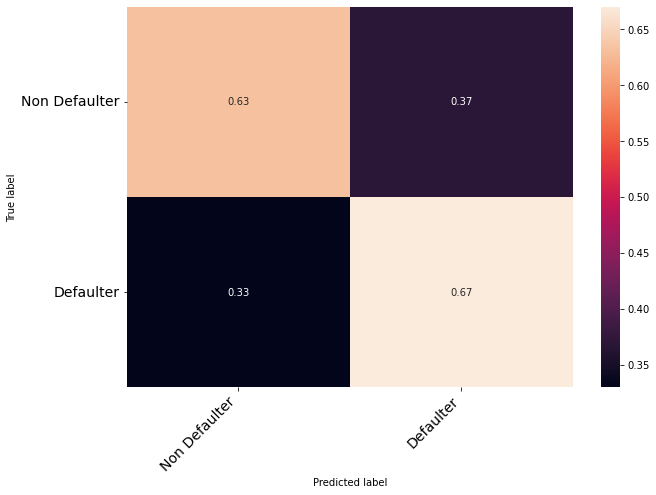

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
confusion_matrix_cs = confusion_matrix(y_true = test_woe['default_status'],
                                        y_pred = pred_class_test)


# Turn matrix to percentages
confusion_matrix_cs = confusion_matrix_cs.astype('float') / confusion_matrix_cs.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_cs, index=['Non Defaulter', 'Defaulter'], 
        columns=['Non Defaulter', 'Defaulter'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

In [ ]:
#Creating Scorecard
default_sc = sc.scorecard(bins_adj,         # bins from the WoE
                           logreg,  # Trained logistic regression
                           train_woe.drop(columns='default_status'), # The column names in the trained LR
                           points0=750, # Base points
                           odds0=0.01, # Base odds bads:goods
                           pdo=50
                           ) # PDO 

In [ ]:
#To make the data with no woe match with our train woe
drop_list_sc=['num_rev_tl_bal_gt_0','fico_range_low','tot_cur_bal',
                       'bc_util','total_bc_limit','revol_util','avg_cur_bal',
                       'mo_sin_rcnt_rev_tl_op','inq_last_6mths','mths_since_recent_inq',
                       'open_rv_12m','mths_since_recent_bc','home_ownership','inq_fi','mths_since_rcnt_il','installment','open_il_24m'	,
                           'mths_since_recent_bc_dlq','mths_since_last_record','earliest_cr_line']

In [ ]:
logis_train.drop(drop_list_sc, axis=1,inplace=True)
logis_test.drop(drop_list_sc, axis=1,inplace=True)

In [ ]:
train_score = sc.scorecard_ply(logis_train, default_sc, 
                               print_step=0)
test_score = sc.scorecard_ply(logis_test, default_sc, 
                               print_step=0)

In [ ]:
train_score.describe()

score
count  896430.000000
mean      431.490084
std        59.360655
min       258.000000
25%       390.000000
50%       429.000000
75%       471.000000
max       680.000000

In [ ]:
test_score.describe()

score
count  384185.000000
mean      431.471187
std        59.386793
min       258.000000
25%       390.000000
50%       429.000000
75%       471.000000
max       671.000000

In [ ]:
#Save trained Scorecard into pickle
import pickle

with open('default_sc.pkl', 'wb') as f:
    pickle.dump(default_sc, f)

In [ ]:
#Set seed to have the same result evertime
seed = 20230404

In [ ]:
#Since we are using the larger data set, we are removing ones with high correlation or reduce overfitting from the start.
train_t=train.drop(['earliest_cr_line','fico_range_low','open_rv_12m','inq_last_6mths'],axis=1,inplace=False)
test_t=test.drop(['earliest_cr_line','fico_range_low','open_rv_12m','inq_last_6mths'],axis=1,inplace=False)

In [ ]:
from xgboost import XGBClassifier 
#Define the classifier.
xgb_default = XGBClassifier(max_depth=2,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=50,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=-1,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights. G / B
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=seed,        # Seed
                            tree_method='hist',           # How to train the trees?
                            #gpu_id=0                     # With which GPU?
                            )

In [ ]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [500, 800, 1000],
                   'max_depth': [2, 4, 6],
                 'learning_rate' : [0.01, 0.05, 0.1, 0.15]
                  })

In [ ]:
# Train on a reduce sample of the train set, as we will call many functions.
val_train = train_t.sample(frac = 0.5,               # The fraction to extract
                                       random_state = seed,    # The seed.
                                       )

In [ ]:
val_train.shape

(448215, 69)

In [ ]:
#Creating the Grid Search
from sklearn.model_selection import GridSearchCV

# Define grid search object.
GridXGB = GridSearchCV(xgb_default,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = -1,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [ ]:
#Fitting Grid Search
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create dummy variables for education
categorical_features = ["home_ownership", 'application_type']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)],
    remainder='passthrough'
)

# Now we define a Pipeline to process everything
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", GridXGB)]
)

# Train the XGB.
clf.fit(val_train.drop(columns='default_status'), # X 
        val_train['default_status']    # y
        )

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['home_ownership',
                                                   'application_type'])])),
                ('classifier',
                 GridSearchCV(cv=3,
                              estimator=XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      callbacks=None,
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      early_stoppin...
                                          

In [ ]:
#Store the cvresults
CV_results = pd.DataFrame(GridXGB.cv_results_)

In [ ]:
# Show best params
print(f'The best AUC is {GridXGB.best_score_:.3f}')
GridXGB.best_params_

The best AUC is 0.736


{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000}

In [ ]:
# Create XGB with best parameters.
xgb_default_best = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=GridXGB.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=GridXGB.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=-1,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=seed,        # Seed
                            tree_method='gpu_hist',       # How to train the trees?
                            gpu_id=0                      # With which GPU?
                            )

In [ ]:
# Create dummy variables for education
categorical_features = ["home_ownership",'application_type']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)],
    remainder='passthrough'
)

# Now we define a Pipeline to process everything
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", xgb_default_best)]
)

# Train the XGB.
clf.fit(train_t.drop(columns='default_status'), # X 
        train_t['default_status']    # y
        )

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['home_ownership',
                                                   'application_type'])])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categor...
                               feature_types=None, gamma=0.001, gpu_id=0,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_bin=256, max_cat_threshold=64,
      

In [ ]:
#Save trained XGB into pickle
import pickle

with open('xgb_default_best.pkl', 'wb') as f:
    pickle.dump(xgb_default_best, f)

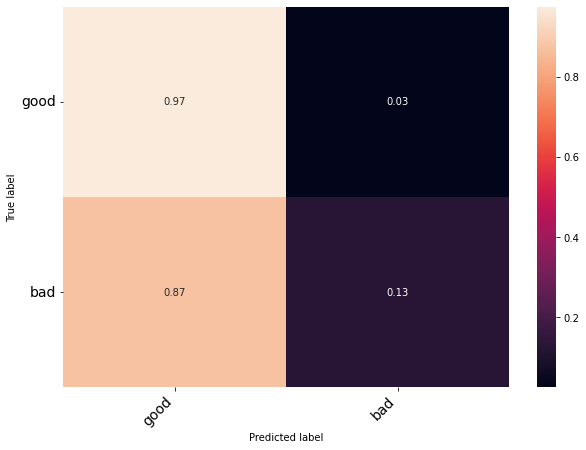

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate probability
XGBClassTest = clf.predict(test.drop(columns="default_status"))
xg_probs_test = clf.predict_proba(test.drop(columns="default_status"))
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = test['default_status'], 
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

In [ ]:
train_t.shape

(896430, 69)

In [ ]:
#SHAP
!pip install shap

In [ ]:
import shap
import xgboost
shap.initjs() # Import Java engine.

In [ ]:
# Create dummy variables for education
categorical_features = ["home_ownership",'application_type']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)],
    remainder='passthrough'
)
# Create transformed data from previous preprocessor
data = pd.DataFrame(preprocessor.fit_transform(test_t.drop(columns=["default_status"],axis=1)))


# Trains the game-theoretic model. Really complex so requires sampling.
explainer = shap.TreeExplainer(xgb_default_best,                 # The model    
                              data = shap.sample(data, 100)  # Create a sample of 100 cases
                              )

# Applies model ot the full dataset.
shap_values = explainer.shap_values(data, check_additivity=False)

100%|===================| 384144/384185 [31:59<00:00]        

In [ ]:
#saving shap value in pickle
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

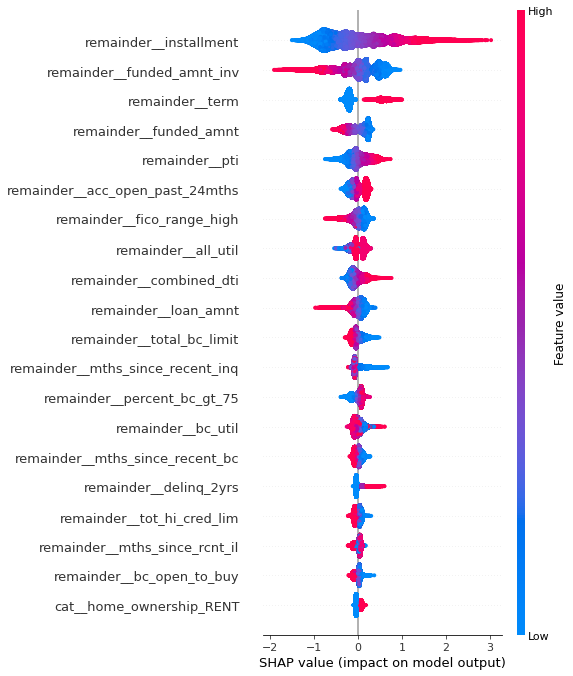

In [ ]:
#Graphing the shap value and saving it
data.columns = preprocessor.get_feature_names_out()
shap.summary_plot(shap_values,                       # The Shapley values.
                  data, # The training sample
                  show=False)                        # Whether to print the model or not

# Let's save this as a PDF for later use.
plt.savefig('ShapSummaryPlot.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
performance.shape

(1280646, 39)

In [ ]:
# 31 rows need to be deleted because they are totally empty across all the columns:

null_rows = performance['out_prncp'].isnull()
new_performance = performance.drop(performance[null_rows].index)
new_performance.shape

(1280615, 39)

In [ ]:
#Create response
new_performance['default_status'] = performance['loan_status'].apply(lambda x: 1 if x in ['Charged Off','Default'] else 0)


In [ ]:
# Drop: too many unique values and do not provide much predictibility.

new_performance = new_performance.drop(['hardship_reason','hardship_end_date','payment_plan_start_date',
                                        'hardship_start_date','last_pymnt_d','next_pymnt_d','settlement_date','issue_d','loan_status'],axis=1)

In [ ]:
new_performance.shape

## 39-32 = 7 columns are gone!

(1280615, 31)

In [ ]:
#Fill with 0,-1,meadian
new_performance.hardship_amount.fillna(0, inplace=True)
new_performance.hardship_length.fillna(0, inplace=True)
new_performance.mths_since_last_delinq.fillna(-1, inplace=True)
new_performance.mths_since_last_major_derog.fillna(-1, inplace=True)
new_performance.hardship_dpd.fillna(-1, inplace=True)
new_performance.orig_projected_additional_accrued_interest.fillna(0, inplace=True)
new_performance.hardship_payoff_balance_amount.fillna(0, inplace=True)
new_performance.hardship_last_payment_amount.fillna(0, inplace=True)
new_performance.settlement_amount.fillna(0, inplace=True)
new_performance.settlement_percentage.fillna(0, inplace=True)
new_performance.settlement_term.fillna(-1, inplace=True)
new_performance.total_rev_hi_lim.fillna(new_performance.total_rev_hi_lim.median(), inplace=True)

In [ ]:
new_performance = new_performance.drop(['deferral_term','hardship_type'],axis=1)

In [ ]:
# Function to clean hardship_loan_status:

def clean_hls(x):
    if x == 'Late (16-30 days)':
        return 1
    elif x == 'In Grace Period':
        return 2
    elif x == 'Current':
        return 3
    elif x == 'Late (31-120 days)':
        return 4
    elif x == 'Issued':
        return 5
    else:
        return 0

# Apply the function to the column
new_performance['hardship_loan_status'] = new_performance['hardship_loan_status'].apply(clean_hls)

In [ ]:
# Function to clean hardship_status:

def clean_hs(x):
    if x == 'COMPLETED':
        return 1
    elif x == 'BROKEN':
        return 2
    elif x == 'ACTIVE':
        return 3
    else:
        return 0

# Apply the function to the column
new_performance['hardship_status'] = new_performance['hardship_status'].apply(clean_hs)

In [ ]:
# Function to clean settlement_status:

def clean_ss(x):
    if x == 'COMPLETE':
        return 1
    elif x == 'BROKEN':
        return 2
    elif x == 'ACTIVE':
        return 3
    else:
        return 0

# Apply the function to the column
new_performance['settlement_status'] = new_performance['settlement_status'].apply(clean_ss)

In [ ]:
# Function to clean payment plan:

def payplan(x):
    if x == 'n':
        return 0
    else:
        return 1


# Apply the function to the column
new_performance['pymnt_plan'] = new_performance['pymnt_plan'].apply(payplan)

In [ ]:
# Function to clean hardship flag:

def hardshipflag(x):
    if x == 'N':
        return 0
    else:
        return 1


# Apply the function to the column
new_performance['hardship_flag'] = new_performance['hardship_flag'].apply(hardshipflag)

In [ ]:
#Computing EAD and funded amnt
new_performance['funded_amnt']= dfnew['funded_amnt'] - new_performance['total_rec_prncp'] 
new_performance['EAD']= new_performance['funded_amnt'] - new_performance['total_rec_prncp'] 

In [ ]:
#Computing recovered amount
total_recovered_amount = new_performance['recoveries'] + new_performance['collection_recovery_fee'] 

In [ ]:
#Computing rr
new_performance['RR'] = 1-(total_recovered_amount /new_performance['EAD'])

In [ ]:
#Computing LGD
new_performance['LGD'] = 1 - rr
new_performance.loc[new_performance['LGD']<0,'LGD'] = 0
new_performance.loc[new_performance['LGD']>1,'LGD'] = 1
new_performance.loc[new_performance['default_status'] == 1, 'LGD'].describe()

count    268599.000000
mean          0.827858
std           0.249483
min           0.000000
25%           0.773210
50%           0.915264
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [ ]:
train_woe=pd.read_csv('train_woe.csv')
test_woe=pd.read_csv('test_woe.csv')

Transforming dfnew to df_woe to get PD from logreg

In [ ]:

order=['default_status', 'open_acc_6m_woe', 'all_util_woe', 'inq_last_12m_woe',
       'total_bal_il_woe', 'open_act_il_woe', 'open_rv_24m_woe',
       'total_cu_tl_woe', 'dtl_woe', 'mo_sin_rcnt_tl_woe',
       'combined_annual_income_woe', 'fico_range_high_woe', 'rbr_woe',
       'combined_dti_woe', 'il_util_woe', 'acc_open_past_24mths_woe',
       'application_type_woe', 'pti_woe', 'num_actv_rev_tl_woe', 'term_woe',
       'tot_hi_cred_lim_woe', 'max_bal_bc_woe', 'percent_bc_gt_75_woe',
       'bc_open_to_buy_woe']

In [ ]:
import scorecardpy as sc
df_forpd=dfnew[['term', 'fico_range_high', 'application_type', 'open_acc_6m',
       'open_act_il', 'total_bal_il', 'il_util', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'bc_open_to_buy', 'mo_sin_rcnt_tl', 'num_actv_rev_tl',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'combined_annual_income',
       'combined_dti', 'pti', 'rbr', 'dtl', 'default_status']]
df_woe = sc.woebin_ply(df_forpd, bins_adj)

df_woe=df_woe[order]

[INFO] converting into woe values ...
Woe transformating on 1280615 rows and 23 columns in 00:00:36


In [ ]:
#Get PD
prob_d=logreg.predict_proba(df_woe.drop('default_status',axis=1))
print(prob_d)

[[0.70070364 0.29929636]
 [0.54887323 0.45112677]
 [0.67258896 0.32741104]
 ...
 [0.5173678  0.4826322 ]
 [0.34713601 0.65286399]
 [0.43891166 0.56108834]]


In [ ]:
new_performance['PD']= prob_d[:,1]

In [ ]:
dfnew.installment.value_counts()

332.10    2329
301.15    2277
361.38    1926
327.34    1917
602.30    1610
          ... 
711.61       1
794.92       1
979.55       1
149.88       1
856.24       1
Name: installment, Length: 82756, dtype: int64

In [ ]:
#Get revenue and loss due to default
discount_rate=0.05
cost_of_capital_percentage = 0.5
new_performance['cost_of_capital'] = new_performance['int_rate']/100 * cost_of_capital_percentage

new_performance['Revenue']=(new_performance['int_rate']/100
                            -new_performance['cost_of_capital'])*(dfnew['term']*dfnew['installment'])

# create a boolean mask for rows where 'term' is equal to 36
mask1= dfnew['term'] == 36

# apply the discount rate to the relevant rows in new_performance
new_performance.loc[mask1, 'Revenue'] /= (1+discount_rate)**3
new_performance.loc[~mask1, 'Revenue'] /= (1+discount_rate)**5
    



# Estimate the loss due to default
new_performance['loss_due_to_default'] = new_performance['LGD'] * new_performance['EAD']



In [ ]:
#get acceptence rate
sequence = np.arange(0.3, 0.9, 0.05)

accept_rate=[]
for val in sequence:
    count = 0
    for i in new_performance.PD:
        if i > val:
            count += 1
    accept_rate.append(1-(count/len(new_performance.PD)))


print(accept_rate)

[0.21002330911319955, 0.29137094286729426, 0.3802399628303589, 0.4738598251621291, 0.5689172780265732, 0.6627432913092537, 0.7512007902453118, 0.8299801267359823, 0.8962873306965794, 0.9467622978022279, 0.9800580189986843, 0.996152629791155, 0.9999976573755578]


In [ ]:
#get revenue
sequence = np.arange(0.3, 0.9, 0.05)


revenue=[]
for val in sequence:
    rev = 0
    for index, row in new_performance.iterrows():
        gain=0
        if row['PD']  < val:
            if row['default_status'] == 0:
                gain= row['Revenue']
            else:
                continue
            rev += gain
        else:
            continue
    revenue.append(rev)
    
print(revenue)


[182460087.62301502, 266282679.63253093, 361892389.8114744, 465717985.44433224, 574178050.3045696, 682864313.3103061, 788111421.0524985, 883808475.2251937, 965299593.2496567, 1029706920.3089362, 1071729750.5410813, 1091162013.3429782, 1095652003.8862705]


In [ ]:
#get cost
sequence = np.arange(0.3, 0.9, 0.05)


cost=[]
for val in sequence:
    c = 0
    for index, row in new_performance.iterrows():
        loss=0
        if row['PD']  < val:
            if row['default_status'] == 1:
                loss= row['loss_due_to_default']
            else:
                continue
            c += loss
        else:
            continue
    cost.append(c)
    
print(cost)


[111305149.60180004, 178364200.27900016, 263960011.45900148, 365215090.36070293, 483292835.4699057, 617992276.4106991, 765363456.067884, 919640563.5463862, 1081103808.8569722, 1235356915.1150987, 1371442902.9771929, 1462883478.9313142, 1490335802.6023178]


In [ ]:
#get profit
profit=[]
for i in range(len(revenue)):
    p = revenue[i] - cost[i]
    profit.append(p)

max_index = profit.index(max(profit))
optimal_cutoff=sequence = np.arange(0.3, 0.9, 0.05)[max_index]
print(optimal_cutoff.round(2))

0.45


In [ ]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from prettytable import PrettyTable
sequence = np.arange(0.3, 0.9, 0.05).round(2)

new_accept_rate = [round(i*100,4) for i in accept_rate]
new_expected_profit = [round(i, 1) for i in profit]

# Create a table instance
table = PrettyTable()

# Add columns to the table
table.add_column("Cutoff",sequence)
table.add_column("Accept Rate",new_accept_rate)
table.add_column("Profit",new_expected_profit)

# Display the table
print(table)

+--------+-------------+--------------+
| Cutoff | Accept Rate |    Profit    |
+--------+-------------+--------------+
|  0.3   |   21.0023   |  71154938.0  |
|  0.35  |   29.1371   |  87918479.4  |
|  0.4   |    38.024   |  97932378.4  |
|  0.45  |    47.386   | 100502895.1  |
|  0.5   |   56.8917   |  90885214.8  |
|  0.55  |   66.2743   |  64872036.9  |
|  0.6   |   75.1201   |  22747965.0  |
|  0.65  |    82.998   | -35832088.3  |
|  0.7   |   89.6287   | -115804215.6 |
|  0.75  |   94.6762   | -205649994.8 |
|  0.8   |   98.0058   | -299713152.4 |
|  0.85  |   99.6153   | -371721465.6 |
|  0.9   |   99.9998   | -394683798.7 |
+--------+-------------+--------------+


In [ ]:
#Monthly PD

In [ ]:
# Package load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Bigger and prettier plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [ ]:
new_performance.PD.describe()

count    1.280615e+06
mean     4.621062e-01
std      1.797505e-01
min      2.518042e-02
25%      3.252017e-01
50%      4.636840e-01
75%      5.992989e-01
max      9.025472e-01
Name: PD, dtype: float64

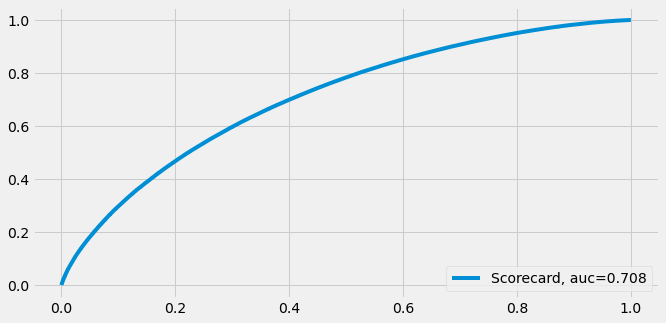

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(new_performance['default_status'], 
                                 new_performance['PD'])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = new_performance['default_status'], 
                             y_score = new_performance['PD']),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Scorecard, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
!pip install pwlf

In [ ]:
import pwlf

# Define the curve with the ROC curve
piecewise_AUC = pwlf.PiecewiseLinFit(fpr, tpr)

In [ ]:
# Calculate the best curve. Long!
res = piecewise_AUC.fit(10)

In [ ]:
#saving res
res=[0.        , 0.05267865, 0.17221712, 0.36316776, 0.63749117,
       1.        ]

In [ ]:
ROC_curve = pd.DataFrame({'fpr': fpr, 'threshold': thresholds})
ROC_curve

fpr  threshold
0       0.000000   1.902547
1       0.000000   0.902547
2       0.000000   0.901979
3       0.000003   0.898925
4       0.000003   0.898616
...          ...        ...
392840  0.999934   0.034020
392841  0.999934   0.034015
392842  0.999956   0.032148
392843  0.999958   0.032146
392844  1.000000   0.025180

[392845 rows x 2 columns]

In [ ]:
#get cuts
cuts = piecewise_AUC.fit_with_breaks(res)

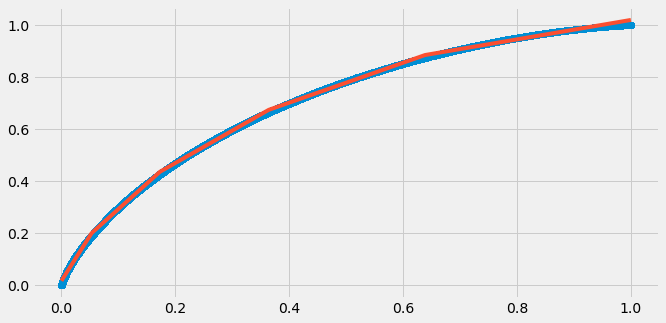

In [ ]:
#fit it back to the original ROC
xHat = np.linspace(min(fpr), max(fpr), num=10000)
yHat = piecewise_AUC.predict(xHat)

# plot the results
plt.figure()
plt.plot(fpr, tpr, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

In [ ]:
#create pbb
pbb_cuts = np.zeros_like(res)
i = 0

for fpr in res:
  temp = ROC_curve.loc[np.round(ROC_curve.fpr, 2) == np.round(fpr, 2), 'threshold']
  pbb_cuts[i] = np.mean(temp)
  i += 1

pbb_cuts = np.flip(pbb_cuts)

In [ ]:
pbb_cuts = np.append(pbb_cuts, 1)
pbb_cuts = np.insert(pbb_cuts, 0, 0)
pbb_cuts

array([0.        , 0.06091178, 0.36121674, 0.50415193, 0.61581574,
       0.72375786, 0.84713427, 1.        ])

In [ ]:
pd_cut = pd.cut(new_performance['PD'], pbb_cuts)
pd_cut

0          (0.0609, 0.361]
1           (0.361, 0.504]
2          (0.0609, 0.361]
3           (0.361, 0.504]
4           (0.361, 0.504]
                ...       
1280641    (0.0609, 0.361]
1280642     (0.616, 0.724]
1280643     (0.361, 0.504]
1280644     (0.616, 0.724]
1280645     (0.504, 0.616]
Name: PD, Length: 1280615, dtype: category
Categories (7, interval[float64, right]): [(0.0, 0.0609] < (0.0609, 0.361] < (0.361, 0.504] < (0.504, 0.616] < (0.616, 0.724] < (0.724, 0.847] < (0.847, 1.0]]

In [ ]:
#to check if PD is monotonous
# Create table with cases total.
PDs_Tab = pd.crosstab(pd_cut,
                      new_performance['default_status'],
                      normalize = False)

# Calculate default rate.
print(PDs_Tab)
pd_final = PDs_Tab[1] / (PDs_Tab[0] + PDs_Tab[1])
pd_final

default_status        0      1
PD                            
(0.0, 0.0609]      1976     59
(0.0609, 0.361]  362230  33422
(0.361, 0.504]   283466  57579
(0.504, 0.616]   192328  64266
(0.616, 0.724]   121517  64535
(0.724, 0.847]    48471  45149
(0.847, 1.0]       2028   3589


PD
(0.0, 0.0609]      0.028993
(0.0609, 0.361]    0.084473
(0.361, 0.504]     0.168831
(0.504, 0.616]     0.250458
(0.616, 0.724]     0.346865
(0.724, 0.847]     0.482258
(0.847, 1.0]       0.638953
dtype: float64

In [ ]:
# 31 rows need to be deleted because they are totally empty across all the columns:

null_rows = performance['issue_d'].isnull()
performance = performance.drop(performance[null_rows].index)
performance.shape


(1280615, 39)

In [ ]:
new_performance['issue_d']=performance['issue_d']

In [ ]:
# Create a dictionary to map each unique date to an integer value from 1 to 138
date_dict = {date: i for i, date in enumerate(new_performance['issue_d'].unique(), 1)}

# Map the dates to their corresponding integer values using the dictionary
new_performance['issue_d'] = new_performance['issue_d'].map(date_dict)

In [ ]:
new_performance['issue_d'].value_counts()

28     36755
3      28562
6      27163
1      26364
17     24366
       ...  
88        19
101       17
98        17
100       11
102       10
Name: issue_d, Length: 138, dtype: int64

In [ ]:
#Combining first two columns
pbb_cuts = [0.06091178, 0.36121674, 0.50415193, 0.61581574,
       0.72375786, 0.84713427, 1.        ]

# Add the PDCut variable to our dataframe
new_performance['PD_Cut'] = pd.cut(new_performance['PD'], pbb_cuts)


# Create pivot table
PD_monthly = pd.pivot_table(new_performance,
                            values = 'default_status',
                            index = 'issue_d',
                            columns = 'PD_Cut',
                            aggfunc = np.mean
                            )



In [ ]:
PD_monthly

PD_Cut   (0.0609, 0.361]  (0.361, 0.504]  (0.504, 0.616]  (0.616, 0.724]  \
issue_d                                                                    
1               0.149829        0.248848        0.322265        0.404922   
2               0.096837        0.174983        0.268063        0.353155   
3               0.090465        0.169618        0.259655        0.347731   
4               0.101706        0.185428        0.270134        0.358379   
5               0.089827        0.170867        0.245565        0.356388   
...                  ...             ...             ...             ...   
134             0.076524        0.127653        0.165556        0.220898   
135             0.083116        0.149157        0.189462        0.243744   
136             0.141965        0.235156        0.324433        0.413432   
137             0.132708        0.241995        0.323928        0.420198   
138             0.142332        0.229078        0.326636        0.413164   

PD_Cut   (0.724, 0.847]  (0.847, 1.0]  
issue_d                                
1              0.535455      0.616327  
2              0.487214      0.617424  
3              0.470939      0.621170  
4              0.495168      0.650407  
5              0.500260      0.610224  
...                 ...           ...  
134            0.237805           NaN  
135            0.307143           NaN  
136            0.469027      1.000000  
137            0.570175           NaN  
138            0.513619      1.000000  

[138 rows x 6 columns]

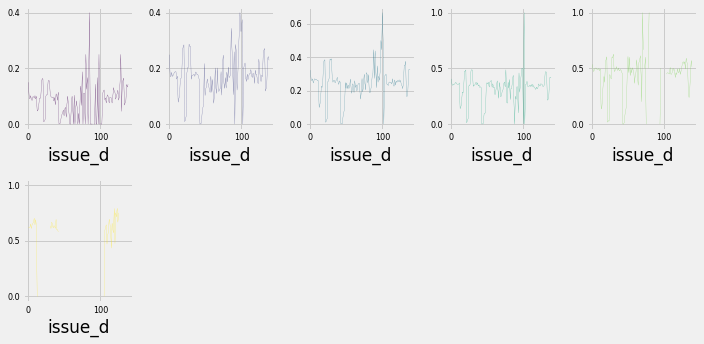

In [ ]:
#Plotting the rates
PD_monthly.plot(subplots=True,
          layout=(2, 5),
          sharex=False,
          sharey=False,
          colormap='viridis',
         fontsize=8,
         legend=False,
         linewidth=0.2);
plt.tight_layout();

In [ ]:
#Importing Economic Factors
interest_rate=pd.read_csv('FEDFUNDS.csv')
M1=pd.read_csv('M1.csv')
Unemploy=pd.read_csv('Unemployment.csv')

econ_factors=pd.DataFrame()
econ_factors['M1']=M1.WM1NS
econ_factors['interest_rate']=interest_rate.FEDFUNDS
econ_factors['unemployment_rate']=Unemploy.UNRATE
econ_factors = econ_factors.drop(econ_factors.index[:6])
econ_factors['Portfolio']=list(range(1, 139))

In [ ]:
econ_factors.shape

(138, 4)

In [ ]:
Unemploy.head()

DATE  UNRATE
0  2007-01-01     4.6
1  2007-02-01     4.5
2  2007-03-01     4.4
3  2007-04-01     4.5
4  2007-05-01     4.4

In [ ]:
Unemploy.describe()

UNRATE
count  144.000000
mean     6.519444
std      2.001268
min      3.700000
25%      4.700000
50%      6.100000
75%      8.300000
max     10.000000

In [ ]:
from scipy.stats import zscore
econ_factors=econ_factors.apply(zscore)
econ_factors.describe()

M1  interest_rate  unemployment_rate     Portfolio
count  1.380000e+02   1.380000e+02       1.380000e+02  1.380000e+02
mean  -1.174584e-16  -3.218038e-17       3.716834e-16 -3.057136e-17
std    1.003643e+00   1.003643e+00       1.003643e+00  1.003643e+00
min   -1.468247e+00  -5.865127e-01      -1.460048e+00 -1.719545e+00
25%   -1.001614e+00  -5.424236e-01      -8.573960e-01 -8.597724e-01
50%    2.450389e-02  -5.071523e-01      -2.296336e-01  0.000000e+00
75%    8.136734e-01   1.938642e-01       8.501176e-01  8.597724e-01
max    1.723417e+00   3.989935e+00       1.703874e+00  1.719545e+00

In [ ]:
from datetime import date
from dateutil.relativedelta import *
#Creating time series object
start_date = date(2007, 1, 1)
PD_monthly.index = [pd.to_datetime(start_date + relativedelta(months=+portfolio_month-1), errors = 'coerce') for portfolio_month in PD_monthly.index] 
econ_factors.index = [pd.to_datetime(start_date + relativedelta(months=+portfolio_month-1), errors = 'coerce') for portfolio_month in econ_factors.index] 
econ_factors.drop(columns='Portfolio', inplace = True)

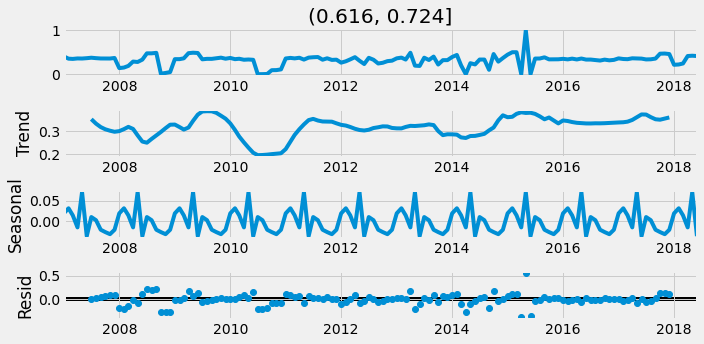

In [ ]:
#Check it theres seasonality and stationary
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(PD_monthly.iloc[:, 3], model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# Define the search space.
p = range(1, 6)
d = range(0, 2)
q = range(0, 2)

# Create an interative list of ps, ds, qs.
from itertools import product
pdq = list(product(p, d, q))

# Seasonal parameters. One year back.
ps = range(0, 4)
ds = range(0, 1)
qs = range(0, 1)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(ps, ds, qs))]

# Train the models for a series and test multiple values.
y = PD_monthly.iloc[:, 2] # Choose the second rating

from statsmodels.tsa.statespace.sarimax import SARIMAX

auc_out = []

for param in pdq:
  for param_seasonal in seasonal_pdq:
      mod = SARIMAX(y,
                    exog=np.asarray(econ_factors),
                    order=param,
                    seasonal_order=param_seasonal,
                    enforce_stationarity=False,
                    enforce_invertibility=False
                    )
      results = mod.fit()
      auc_out.append([param, param_seasonal, results.aic])
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

In [ ]:
auc_out

[[(1, 0, 0), (0, 0, 0, 12), -266.36387126663067],
 [(1, 0, 0), (1, 0, 0, 12), -231.88152701516648],
 [(1, 0, 0), (2, 0, 0, 12), -227.86973191077553],
 [(1, 0, 0), (3, 0, 0, 12), -200.25453204972268],
 [(1, 0, 1), (0, 0, 0, 12), -267.77066284596947],
 [(1, 0, 1), (1, 0, 0, 12), -235.1566407813591],
 [(1, 0, 1), (2, 0, 0, 12), -227.9358393183021],
 [(1, 0, 1), (3, 0, 0, 12), -198.35252091344873],
 [(1, 1, 0), (0, 0, 0, 12), -264.3318121952011],
 [(1, 1, 0), (1, 0, 0, 12), -230.46524058399072],
 [(1, 1, 0), (2, 0, 0, 12), -221.71624536133086],
 [(1, 1, 0), (3, 0, 0, 12), -187.0429301618237],
 [(1, 1, 1), (0, 0, 0, 12), -286.0359048257131],
 [(1, 1, 1), (1, 0, 0, 12), -252.40801117579673],
 [(1, 1, 1), (2, 0, 0, 12), -236.89790512091258],
 [(1, 1, 1), (3, 0, 0, 12), -204.9284450346574],
 [(2, 0, 0), (0, 0, 0, 12), -265.69215559394115],
 [(2, 0, 0), (1, 0, 0, 12), -230.47354614034188],
 [(2, 0, 0), (2, 0, 0, 12), -222.8835641129432],
 [(2, 0, 0), (3, 0, 0, 12), -195.77427912620087],
 [(2, 0

In [ ]:
# ARIMA(3,0,1)x(0, 0, 0, 12)12 are the best set since it gives the smallest AIC
mod_BB = SARIMAX(y,
              exog=np.asarray(econ_factors),
              order=(3,0,1),
              seasonal_order=(0, 0, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results_BB = mod_BB.fit()

print(results_BB.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0785      0.093      0.842      0.400      -0.104       0.261
x2            -0.0323      0.045     -0.722      0.470      -0.120       0.055
x3            -0.0314      0.041     -0.773      0.439      -0.111       0.048
ar.L1          1.5994      0.073     21.944      0.000       1.457       1.742
ar.L2         -0.7072      0.133     -5.332      0.000      -0.967      -0.447
ar.L3          0.1034      0.095      1.084      0.278      -0.084       0.291
ma.L1         -0.9972      0.409     -2.438      0.015      -1.799      -0.196
sigma2         0.0065      0.003      2.599      0.009       0.002       0.011


D:\US\2\New Folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\US\2\New Folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\US\2\New Folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


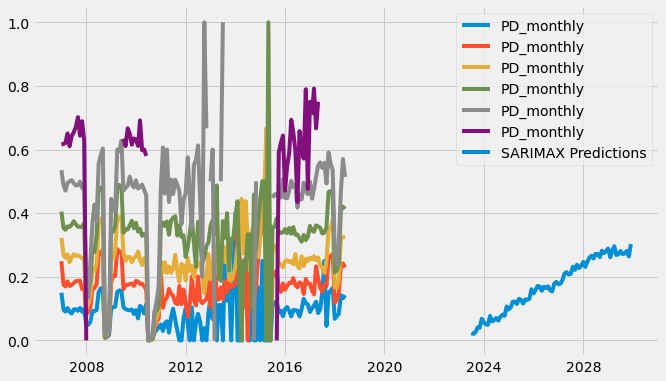

In [ ]:
#Graph the prediction
pred=results_BB.forecast(steps=138,exog=np.asarray(econ_factors))
plt.figure(figsize=(10, 6))
plt.plot(PD_monthly, label='PD_monthly')
plt.plot(pred[60:], label='SARIMAX Predictions')
plt.legend(loc='upper right')
plt.show()